In [45]:
# Importing relevant packages
import pandas as pd
import matplotlib.pyplot as plt
import _functions_sql as fs
import numpy as np
import seaborn as sns

In [15]:
# Installing custom fonts - needed in case you want to plot with specific, non-standard fonts 
import matplotlib
from matplotlib import font_manager
font_dirs = ["/Library/Fonts"]  # path to the custom font file
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

In [16]:
# Import production table from database
df_prod_emis = fs.get_dataframe("SELECT * from production_and_emissions_new")

In [17]:
df_prod_emis['prod_pop'] = df_prod_emis['production_in_t'] / df_prod_emis['population']
df_prod_emis['emis_pop'] = df_prod_emis['emissions_co2eq_combined_in_kt'] / df_prod_emis['population']
df_prod_emis = df_prod_emis[df_prod_emis['item_category'] != 'Live Animals']
df_prod_emis = df_prod_emis[~df_prod_emis['country'].isin(['China, mainland', 'China, Hong Kong SAR', 'China, Macao SAR', 'China, Taiwan Province of'])]

In [18]:
df_prod_emis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 871497 entries, 0 to 995627
Data columns (total 29 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   country                                          871497 non-null  object 
 1   continent                                        871497 non-null  object 
 2   subcontinent                                     871497 non-null  object 
 3   special_area                                     871497 non-null  object 
 4   year                                             871497 non-null  int64  
 5   population                                       871497 non-null  int64  
 6   item                                             871497 non-null  object 
 7   item_code                                        871497 non-null  int64  
 8   item_group                                       871497 non-null  object 
 9   item_category       

## World food production

Getting an overview of the worldwide trends in food production and population growth.

In [19]:
world_production = df_prod_emis[(df_prod_emis.country == 'World') & (df_prod_emis.year != 2021)]
continent_production = df_prod_emis[(df_prod_emis.country != 'World') & (df_prod_emis.year != 2021)]

In [20]:
item_categories = world_production.item_category.unique().tolist()
item_groups_crops_primary = world_production[(world_production.item_group != '-') & (world_production.item_category == 'Crops, primary')].item_group.unique().tolist()
item_groups_livestock_primary = world_production[(world_production.item_group != '-') & (world_production.item_category == 'Livestock primary')].item_group.unique().tolist()
item_groups_livestock_processed = world_production[(world_production.item_group != '-') & (world_production.item_category == 'Livestock processed')].item_group.unique().tolist()
continents = continent_production.continent.unique().tolist()

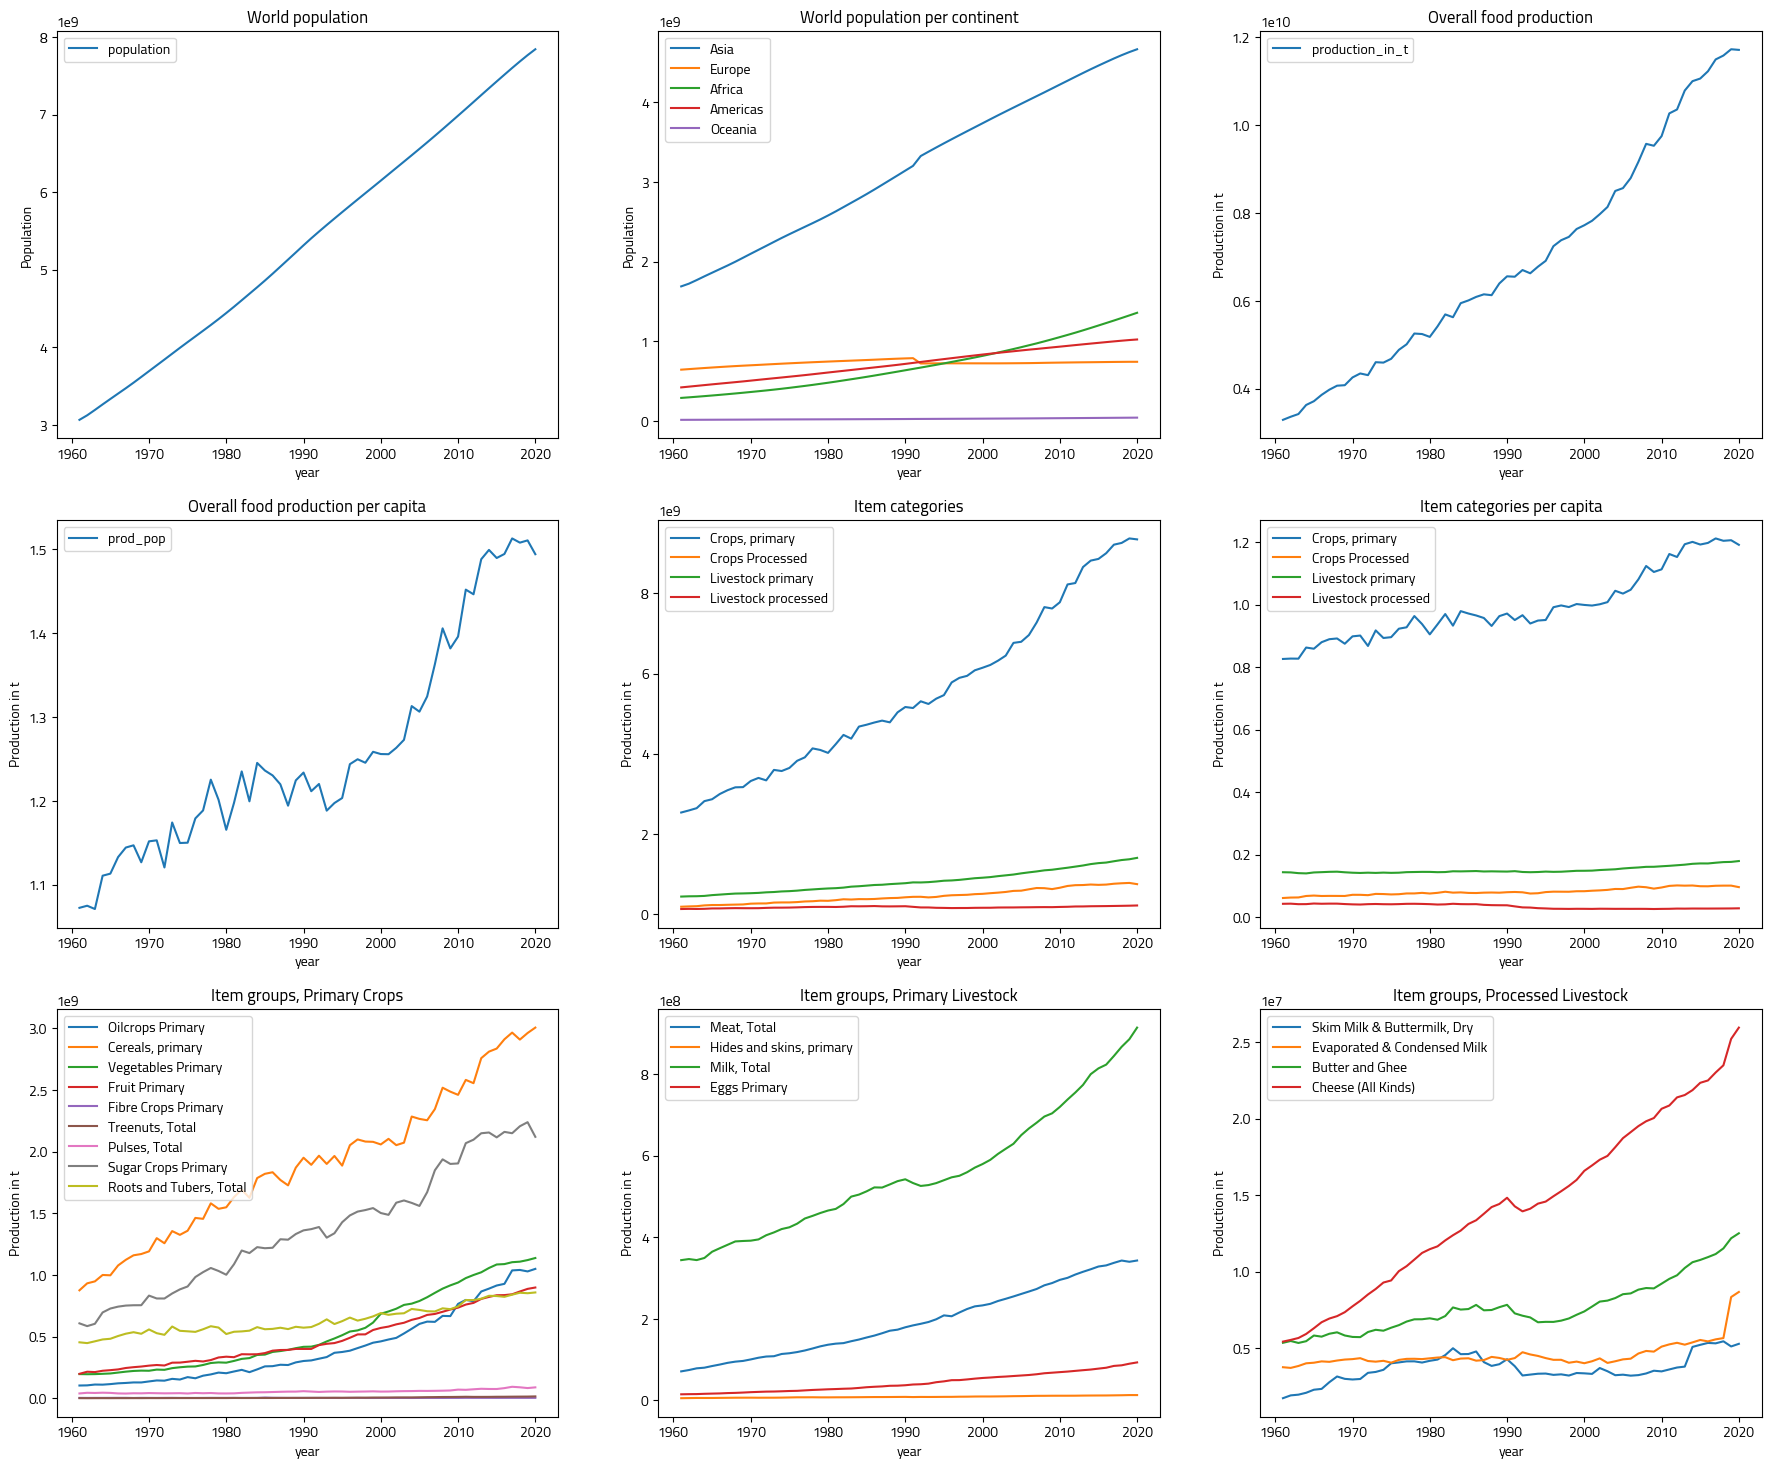

In [21]:
world_production_grouped_0 = world_production[['year', 'population']].groupby(['year'], as_index=False).max()
world_production_grouped_5 = continent_production[['year', 'country', 'continent', 'population']].groupby(['year', 'country', 'continent'], as_index=False).max()
world_production_grouped_5 = world_production_grouped_5[['year', 'continent', 'population']].groupby(['year', 'continent'], as_index=False).sum()
world_production_grouped_1 = world_production[['year', 'production_in_t']].groupby(['year'], as_index=False).sum()
world_production_grouped_2 = world_production[['year', 'prod_pop']].groupby(['year'], as_index=False).sum()
world_production_grouped_6 = world_production[['year', 'item_category', 'prod_pop']].groupby(['year', 'item_category'], as_index=False).sum()
world_production_grouped_3 = world_production[['year', 'item_category', 'production_in_t']].groupby(['year', 'item_category'], as_index=False).sum()
world_production_grouped_4 = world_production[['year', 'item_group', 'production_in_t']].groupby(['year', 'item_group'], as_index=False).sum()

fig, axes = plt.subplots(3, 3, figsize=(22, 18))
plt.rcParams['font.family'] = 'Cairo'

world_production_grouped_0.plot(x='year', y='population', ax=axes[0][0])
axes[0][0].legend()
axes[0][0].set_ylabel('Population')
axes[0][0].set_title('World population')

for continent in continents:
    world_production_grouped_5[world_production_grouped_5.continent == continent].plot(x='year', y='population', ax=axes[0][1], label=continent)
    axes[0][1].legend()
    axes[0][1].set_ylabel('Population')
    axes[0][1].set_title('World population per continent')

world_production_grouped_1.plot(x='year', y='production_in_t', ax=axes[0][2])
axes[0][2].legend()
axes[0][2].set_ylabel('Production in t')
axes[0][2].set_title('Overall food production')

world_production_grouped_2.plot(x='year', y='prod_pop', ax=axes[1][0])
axes[1][0].legend()
axes[1][0].set_ylabel('Production in t')
axes[1][0].set_title('Overall food production per capita')

# Iterate over item categories
for item_category in item_categories:
    world_production_grouped_3[world_production_grouped_3.item_category == item_category].plot(x='year', y='production_in_t', ax=axes[1][1], label=item_category)
    axes[1][1].legend()
    axes[1][1].set_ylabel('Production in t')
    axes[1][1].set_title('Item categories')

# Iterate over item categories
for item_category in item_categories:
    world_production_grouped_6[world_production_grouped_6.item_category == item_category].plot(x='year', y='prod_pop', ax=axes[1][2], label=item_category)
    axes[1][2].legend()
    axes[1][2].set_ylabel('Production in t')
    axes[1][2].set_title('Item categories per capita')

# Iterate over item groups for primary crops
for item_group in item_groups_crops_primary:
    world_production_grouped_4[world_production_grouped_4.item_group == item_group].plot(x='year', y='production_in_t', ax=axes[2][0], label=item_group)
    axes[2][0].legend()
    axes[2][0].set_ylabel('Production in t')
    axes[2][0].set_title('Item groups, Primary Crops')

# Iterate over item groups for primary livestock
for item_group in item_groups_livestock_primary:
    world_production_grouped_4[world_production_grouped_4.item_group == item_group].plot(x='year', y='production_in_t', ax=axes[2][1], label=item_group)
    axes[2][1].legend()
    axes[2][1].set_ylabel('Production in t')
    axes[2][1].set_title('Item groups, Primary Livestock')

# Iterate over item groups for processed livestock
for item_group in item_groups_livestock_processed:
    world_production_grouped_4[world_production_grouped_4.item_group == item_group].plot(x='year', y='production_in_t', ax=axes[2][2], label=item_group)
    axes[2][2].legend()
    axes[2][2].set_ylabel('Production in t')
    axes[2][2].set_title('Item groups, Processed Livestock')

In [22]:
world_production_2020 = world_production[df_prod_emis.year == 2020]

/var/folders/r1/n_vkkx7s0c56p3j6pvf4pxf40000gn/T/ipykernel_23870/2018193223.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  world_production_2020 = world_production[df_prod_emis.year == 2020]


Text(0, 0.5, 'Production in t')

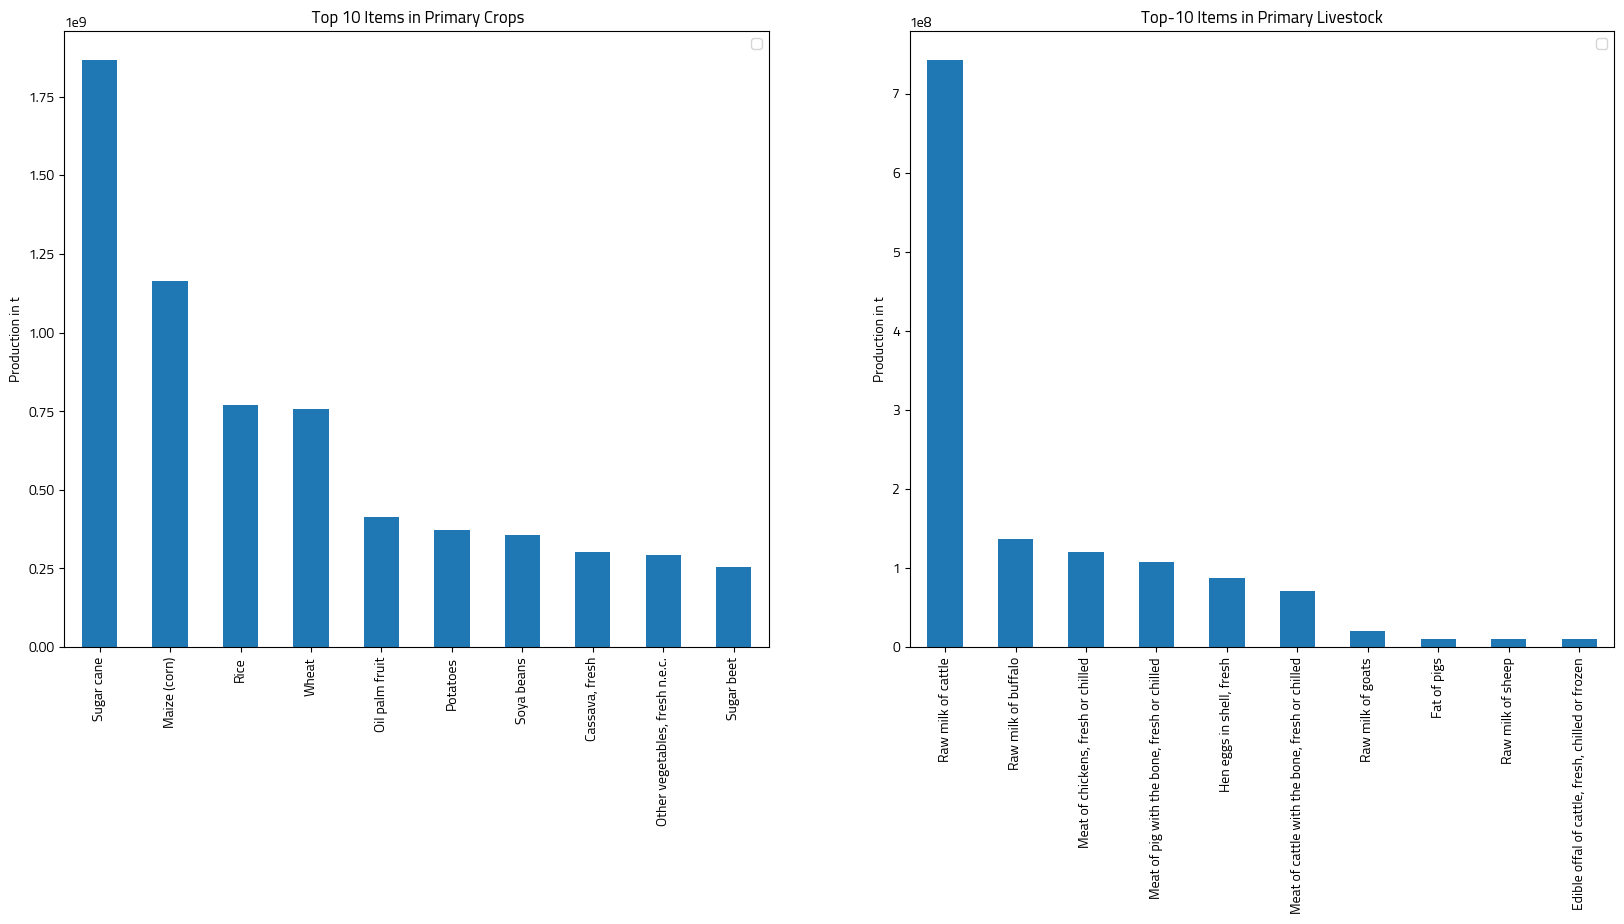

In [23]:
world_production_2020_grouped_1 = world_production_2020[world_production_2020.item_category == 'Crops, primary']
world_production_2020_grouped_1 = world_production_2020_grouped_1[['item', 'production_in_t']].groupby(['item'], as_index=False).agg('sum').sort_values(by='production_in_t', ascending=False)
world_production_2020_grouped_2 = world_production_2020[world_production_2020.item_category == 'Livestock primary']
world_production_2020_grouped_2 = world_production_2020_grouped_2[['item', 'production_in_t']].groupby(['item'], as_index=False).agg('sum').sort_values(by='production_in_t', ascending=False)

# Plot the top-10 agricultural emissions producers
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

world_production_2020_grouped_1.head(10).plot.bar(x='item', y='production_in_t', ax=axes[0])
axes[0].set_title(' Top 10 Items in Primary Crops')
axes[0].set_xlabel('')
axes[0].legend('')
axes[0].set_ylabel('Production in t')

world_production_2020_grouped_2.head(10).plot.bar(x='item', y='production_in_t', ax=axes[1])
axes[1].set_title('Top-10 Items in Primary Livestock')
axes[1].set_xlabel('')
axes[1].legend('')
axes[1].set_ylabel('Production in t')

## World emissions by food production

Expolring overall trends in the worldwide emission amount development (for all foods and specific product groups). 

In [24]:
world_emissions = df_prod_emis[(df_prod_emis.country == 'World') & (df_prod_emis.year != 2021) & (df_prod_emis.emissions_co2eq_combined_in_kt.notnull())]

### Total emissions in kt

In [25]:
item_categories = world_emissions.item_category.unique().tolist()
item_groups = world_emissions.item_group.unique().tolist()
items = world_emissions.item.unique().tolist()
meat = list(filter(lambda x: 'Meat' in x, items))
milk_eggs = list(filter(lambda x: 'Raw milk' in x or 'Hen eggs' in x, items))
rice_wheat_maize = list(filter(lambda x: 'Rice' in x or 'Wheat' in x or 'Maize' in x, items))
remaining = list(set(items) - set(meat + milk_eggs + rice_wheat_maize))

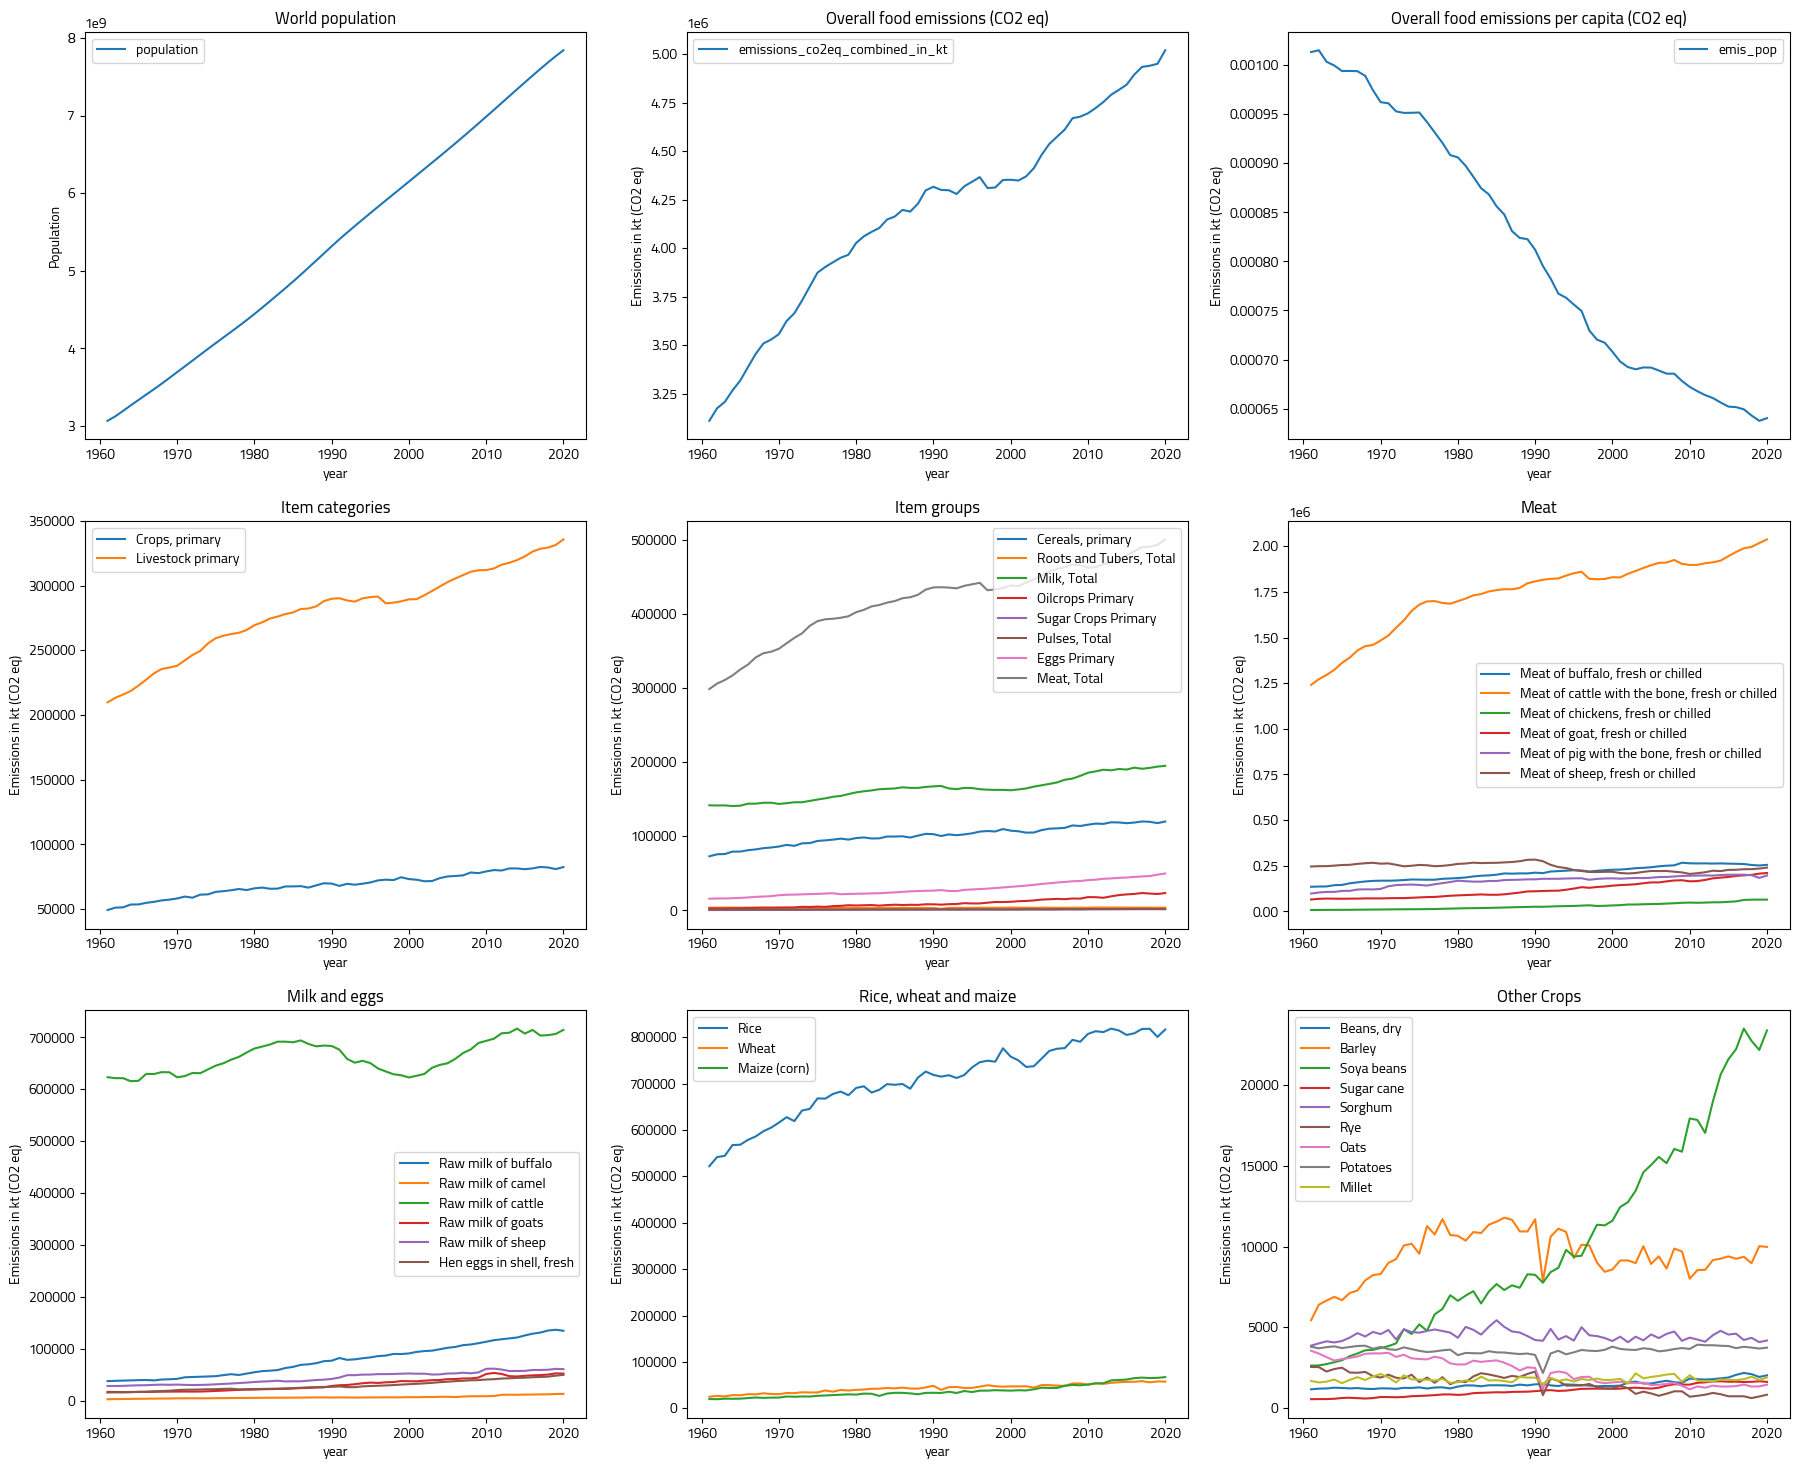

In [26]:
world_emissions_grouped_0 = world_emissions[['year', 'population']].groupby(['year'], as_index=False).max()
world_emissions_grouped_5 = world_emissions[['year', 'emissions_co2eq_combined_in_kt']].groupby(['year'], as_index=False).sum()
world_emissions_grouped_6 = world_emissions[['year', 'emis_pop']].groupby(['year'], as_index=False).sum()
world_emissions_grouped_1 = world_emissions[['item_category', 'year', 'emissions_co2eq_combined_in_kt']].groupby(['item_category', 'year'], as_index=False).agg('mean')
world_emissions_grouped_2 = world_emissions[['item_group', 'year', 'emissions_co2eq_combined_in_kt']].groupby(['item_group', 'year'], as_index=False).agg('mean')
world_emissions_grouped_3 = world_emissions[['item', 'year', 'emissions_co2eq_combined_in_kt']].groupby(['item', 'year'], as_index=False).agg('mean')

fig, axes = plt.subplots(3, 3, figsize=(22, 18))

world_emissions_grouped_0.plot(x='year', y='population', ax=axes[0][0])
axes[0][0].legend()
axes[0][0].set_ylabel('Population')
axes[0][0].set_title('World population')

world_emissions_grouped_5.plot(x='year', y='emissions_co2eq_combined_in_kt', ax=axes[0][1])
axes[0][1].legend()
axes[0][1].set_ylabel('Emissions in kt (CO2 eq)')
axes[0][1].set_title('Overall food emissions (CO2 eq)')

world_emissions_grouped_6.plot(x='year', y='emis_pop', ax=axes[0][2])
axes[0][2].legend()
axes[0][2].set_ylabel('Emissions in kt (CO2 eq)')
axes[0][2].set_title('Overall food emissions per capita (CO2 eq)')

# Iterate over item categories
for item_category in item_categories:
    world_emissions_grouped_1[world_emissions_grouped_1.item_category == item_category].plot(x='year', y='emissions_co2eq_combined_in_kt', ax=axes[1][0], label=item_category)
    axes[1][0].legend()
    axes[1][0].set_ylabel('Emissions in kt (CO2 eq)')
    axes[1][0].set_title('Item categories')

# Iterate over item groups
for item_group in item_groups:
    world_emissions_grouped_2[world_emissions_grouped_2.item_group == item_group].plot(x='year', y='emissions_co2eq_combined_in_kt', ax=axes[1][1], label=item_group)
    axes[1][1].legend()
    axes[1][1].set_ylabel('Emissions in kt (CO2 eq)')
    axes[1][1].set_title('Item groups')

# Iterate over meat items
for item in meat:
    world_emissions_grouped_3[world_emissions_grouped_3.item == item].plot(x='year', y='emissions_co2eq_combined_in_kt', ax=axes[1][2], label=item)
    axes[1][2].legend()
    axes[1][2].set_ylabel('Emissions in kt (CO2 eq)')
    axes[1][2].set_title('Meat')

# Iterate over milk and eggs items
for item in milk_eggs:
    world_emissions_grouped_3[world_emissions_grouped_3.item == item].plot(x='year', y='emissions_co2eq_combined_in_kt', ax=axes[2][0], label=item)
    axes[2][0].legend()
    axes[2][0].set_ylabel('Emissions in kt (CO2 eq)')
    axes[2][0].set_title('Milk and eggs')

# Iterate over rice, wheat and maize items
for item in rice_wheat_maize:
    world_emissions_grouped_3[world_emissions_grouped_3.item == item].plot(x='year', y='emissions_co2eq_combined_in_kt', ax=axes[2][1], label=item)
    axes[2][1].legend()
    axes[2][1].set_ylabel('Emissions in kt (CO2 eq)')
    axes[2][1].set_title('Rice, wheat and maize')

    
# Iterate over remaining items
for item in remaining:
    world_emissions_grouped_3[world_emissions_grouped_3.item == item].plot(x='year', y='emissions_co2eq_combined_in_kt', ax=axes[2][2], label=item)
    axes[2][2].legend()
    axes[2][2].set_ylabel('Emissions in kt (CO2 eq)')
    axes[2][2].set_title('Other Crops')

Text(0.5, 1.0, 'Emissions')

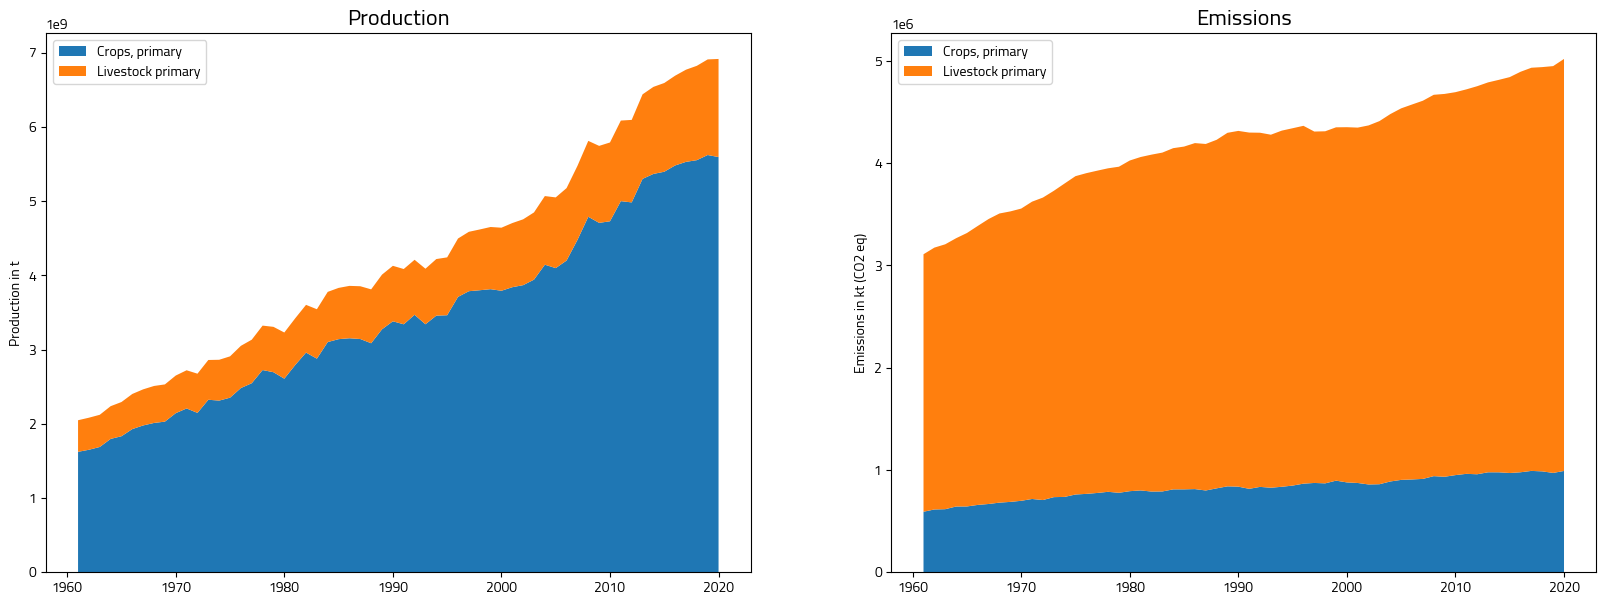

In [27]:
world_emissions_grouped_4 = world_emissions[['item_category', 'year', 'production_in_t', 'emissions_co2eq_combined_in_kt']].groupby(['item_category', 'year'], as_index=False).agg('sum')

x = world_emissions_grouped_4.groupby(['year']).max()
x['year'] = x.index
x = x.year

y1 = world_emissions_grouped_4[world_emissions_grouped_4['item_category'] == 'Crops, primary'].production_in_t
y2 = world_emissions_grouped_4[world_emissions_grouped_4['item_category'] == 'Livestock primary'].production_in_t

z1 = world_emissions_grouped_4[world_emissions_grouped_4['item_category'] == 'Crops, primary'].emissions_co2eq_combined_in_kt
z2 = world_emissions_grouped_4[world_emissions_grouped_4['item_category'] == 'Livestock primary'].emissions_co2eq_combined_in_kt

fig, axes = plt.subplots(1, 2, figsize=(20, 7))

axes[0].stackplot(x, y1, y2, labels=world_emissions_grouped_4.item_category.unique().tolist())
axes[0].legend(loc='upper left')
axes[0].set_ylabel('Production in t')
axes[0].set_title('Production', fontsize=16)

axes[1].stackplot(x, z1, z2, labels=world_emissions_grouped_4.item_category.unique().tolist())
axes[1].legend(loc='upper left')
axes[1].set_ylabel('Emissions in kt (CO2 eq)')
axes[1].set_title('Emissions', fontsize=16)

In [28]:
def meat_type(food_item):
    if food_item == 'Meat of cattle with the bone, fresh or chilled':
        return 'cattle'
    elif food_item == 'Meat of pig with the bone, fresh or chilled':
        return 'pigs'
    elif food_item == 'Meat of chickens, fresh or chilled':
        return 'chickens'
    elif food_item == 'Meat of buffalo, fresh or chilled':
        return 'buffalo'
    elif food_item == 'Meat of goat, fresh or chilled':
        return 'goat'
    elif food_item == 'Meat of sheep, fresh or chilled':
        return 'sheep'
    return 'meat of other animals'

world_emissions_meat= world_emissions[world_emissions.item_group == 'Meat, Total']
world_emissions_meat['meat_type'] = world_emissions_meat.item.apply(lambda x: meat_type(x))

/var/folders/r1/n_vkkx7s0c56p3j6pvf4pxf40000gn/T/ipykernel_23870/3237323339.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_emissions_meat['meat_type'] = world_emissions_meat.item.apply(lambda x: meat_type(x))


In [29]:
meat_short = world_emissions_meat.meat_type.unique().tolist()
meat_short

['buffalo', 'cattle', 'chickens', 'goat', 'pigs', 'sheep']

/var/folders/r1/n_vkkx7s0c56p3j6pvf4pxf40000gn/T/ipykernel_23870/2976523107.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(yticks/100000000)
/var/folders/r1/n_vkkx7s0c56p3j6pvf4pxf40000gn/T/ipykernel_23870/2976523107.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(yticks/100000000)
/var/folders/r1/n_vkkx7s0c56p3j6pvf4pxf40000gn/T/ipykernel_23870/2976523107.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(yticks/100000000)
/var/folders/r1/n_vkkx7s0c56p3j6pvf4pxf40000gn/T/ipykernel_23870/2976523107.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(yticks/100000000)
/var/folders/r1/n_vkkx7s0c56p3j6pvf4pxf40000gn/T/ipykernel_23870/2976523107.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(yticks/100000000)
/var/

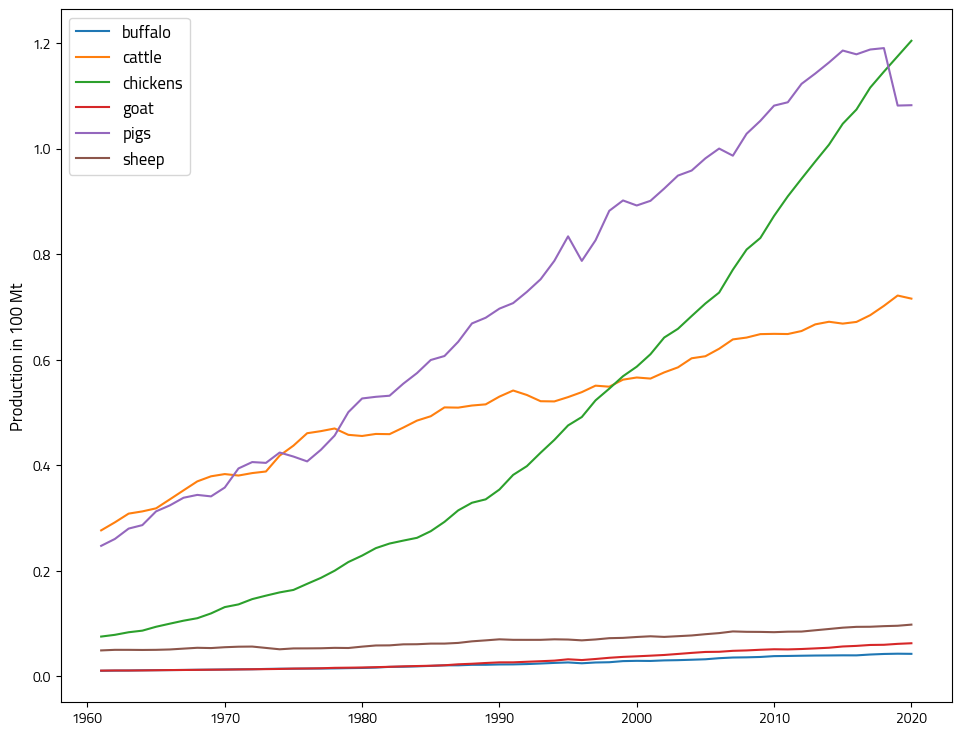

In [30]:
world_emissions_grouped_7 = world_emissions_meat[['meat_type', 'year', 'production_in_t', 'emissions_co2eq_combined_in_kt']].groupby(['meat_type', 'year'], as_index=False).agg('sum')

world_emissions_grouped_7_2020 = world_emissions_grouped_7[(world_emissions_grouped_7.year == 2020)]

fig, axes = plt.subplots(1, 1, figsize=(11.5, 9))

for meat_type in meat_short:
    world_emissions_grouped_7[world_emissions_grouped_7.meat_type == meat_type].plot(x='year', y='production_in_t', ax=axes, label=meat_type)
    axes.legend(fontsize=12)
    axes.set_ylabel('Production in 100 Mt', fontsize=12)
    axes.set_xlabel('')
    yticks = axes.get_yticks()
    axes.set_yticklabels(yticks/100000000)
    #axes.set_title('Development of Meat Production', fontsize=20)

#world_emissions_grouped_9_2020[['meat_type', 'emissions_co2eq_combined_in_kt']].groupby('meat_type').agg('sum').plot.pie(y='emissions_co2eq_combined_in_kt', ax=axes[1], fontsize=13, autopct='%1.1f%%')
#axes[1].set_ylabel('')
#axes[1].legend('')
#axes[1].set_title('Meat Emissions in 2020', fontsize=20)

In [31]:
def crop_type(food_item):
    if food_item == 'Rice':
        return 'rice'
    elif food_item == 'Wheat':
        return 'wheat'
    elif food_item == 'Maize (corn)':
        return 'maize'
    elif food_item == 'Sugar cane':
        return 'sugar cane'
    return 'other crops'

world_emissions_crops = world_emissions[world_emissions.item_category == 'Crops, primary']
world_emissions_crops['crop_type'] = world_emissions_crops.item.apply(lambda x: crop_type(x))

/var/folders/r1/n_vkkx7s0c56p3j6pvf4pxf40000gn/T/ipykernel_23870/2676505879.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_emissions_crops['crop_type'] = world_emissions_crops.item.apply(lambda x: crop_type(x))


In [32]:
crops = world_emissions_crops.crop_type.unique().tolist()
crops

['other crops', 'rice', 'sugar cane', 'wheat', 'maize']

In [33]:
world_emissions_grouped_8 = world_emissions_crops
world_emissions_grouped_8['production_new'] = world_emissions_grouped_8['production_in_t']/10
world_emissions_grouped_8

/var/folders/r1/n_vkkx7s0c56p3j6pvf4pxf40000gn/T/ipykernel_23870/2478579986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_emissions_grouped_8['production_new'] = world_emissions_grouped_8['production_in_t']/10


,country,continent,subcontinent,special_area,year,population,item,item_code,item_group,item_category,...,source_emissions,emissions_co2eq_in_kt,emissions_intensity_in_kg_co2eq_per_kg,production_emissions_in_t,emissions_co2eq_combined_in_kt,emissions_intensity_combined_in_kg_co2eq_per_kg,prod_pop,emis_pop,crop_type,production_new
1,World,World,World,World,2020,7840952880,Millet,79,"Cereals, primary","Crops, primary",...,FAO TIER 1,NaN,NaN,NaN,1891.1460,0.0614,0.003931,2.411883e-07,other crops,3.082505e+06
10,World,World,World,World,2020,7840952880,Oats,75,"Cereals, primary","Crops, primary",...,FAO TIER 1,NaN,NaN,NaN,1445.7340,0.0571,0.003229,1.843824e-07,other crops,2.531951e+06
57,World,World,World,World,2020,7840952880,Potatoes,116,"Roots and Tubers, Total","Crops, primary",...,FAO TIER 1,NaN,NaN,NaN,3739.8655,0.0101,0.047334,4.769657e-07,other crops,3.711432e+07
78,World,World,World,World,2020,7840952880,Rice,27,"Cereals, primary","Crops, primary",...,FAO TIER 1,816502.802,1.0615,769227953.0,816502.8020,1.0615,0.098104,1.041331e-04,rice,7.692280e+07
79,World,World,World,World,2020,7840952880,Rye,71,"Cereals, primary","Crops, primary",...,FAO TIER 1,NaN,NaN,NaN,821.6855,0.0546,0.001918,1.047941e-07,other crops,1.504067e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995455,World,World,World,World,2019,7764951042,Sugar cane,156,Sugar Crops Primary,"Crops, primary",...,FAO TIER 1,NaN,NaN,NaN,1656.1377,0.0008,0.252189,2.132837e-07,sugar cane,1.958234e+08
995475,World,World,World,World,2019,7764951042,Wheat,15,"Cereals, primary","Crops, primary",...,FAO TIER 1,NaN,NaN,NaN,58086.1423,0.0760,0.098399,7.480555e-06,wheat,7.640633e+07
995498,World,World,World,World,2020,7840952880,Barley,44,"Cereals, primary","Crops, primary",...,FAO TIER 1,NaN,NaN,NaN,9986.9225,0.0633,0.020113,1.273687e-06,other crops,1.577071e+07
995499,World,World,World,World,2020,7840952880,"Beans, dry",176,"Pulses, Total","Crops, primary",...,FAO TIER 1,NaN,NaN,NaN,2024.9710,0.0739,0.003496,2.582557e-07,other crops,2.741269e+06


/var/folders/r1/n_vkkx7s0c56p3j6pvf4pxf40000gn/T/ipykernel_23870/4035040233.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_emissions_grouped_8['production_new'] = world_emissions_grouped_8['production_in_t']/10
/var/folders/r1/n_vkkx7s0c56p3j6pvf4pxf40000gn/T/ipykernel_23870/4035040233.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(yticks*10/100000000)
/var/folders/r1/n_vkkx7s0c56p3j6pvf4pxf40000gn/T/ipykernel_23870/4035040233.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(yticks*10/100000000)
/var/folders/r1/n_vkkx7s0c56p3j6pvf4pxf40000gn/T/ipykernel_23870/4035040233.py:16: UserWarning: FixedFormatter should only be used

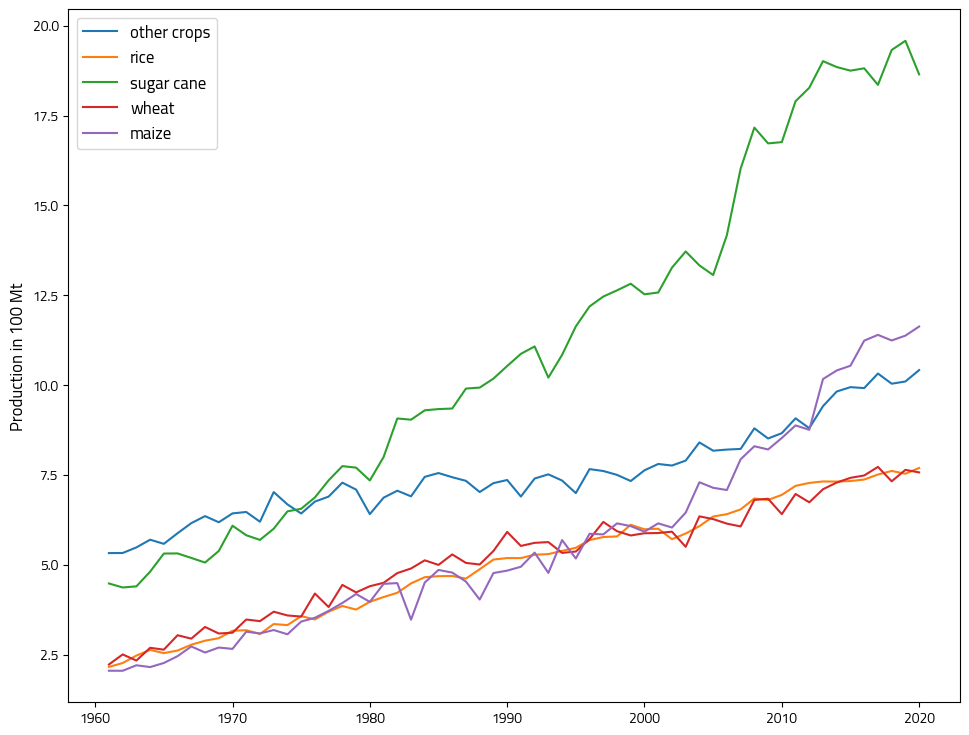

In [34]:
world_emissions_grouped_8 = world_emissions_crops
world_emissions_grouped_8['production_new'] = world_emissions_grouped_8['production_in_t']/10
world_emissions_grouped_8 = world_emissions_grouped_8[['crop_type', 'year', 'production_new', 'emissions_co2eq_combined_in_kt']].groupby(['crop_type', 'year'], as_index=False).agg('sum')

world_emissions_grouped_8_2020 = world_emissions_grouped_8[(world_emissions_grouped_8.year == 2020)]

fig, axes = plt.subplots(1, 1, figsize=(11.5, 9))

for crop_type in crops:
    world_emissions_grouped_8[world_emissions_grouped_8.crop_type == crop_type].plot(x='year', y='production_new', ax=axes, label=crop_type)
    axes.legend(fontsize=12)
    axes.set_ylabel('Production in 100 Mt', fontsize=12)
    axes.set_xlabel('')
    axes.set_yscale
    yticks = axes.get_yticks()
    axes.set_yticklabels(yticks*10/100000000)


### Emission intensity

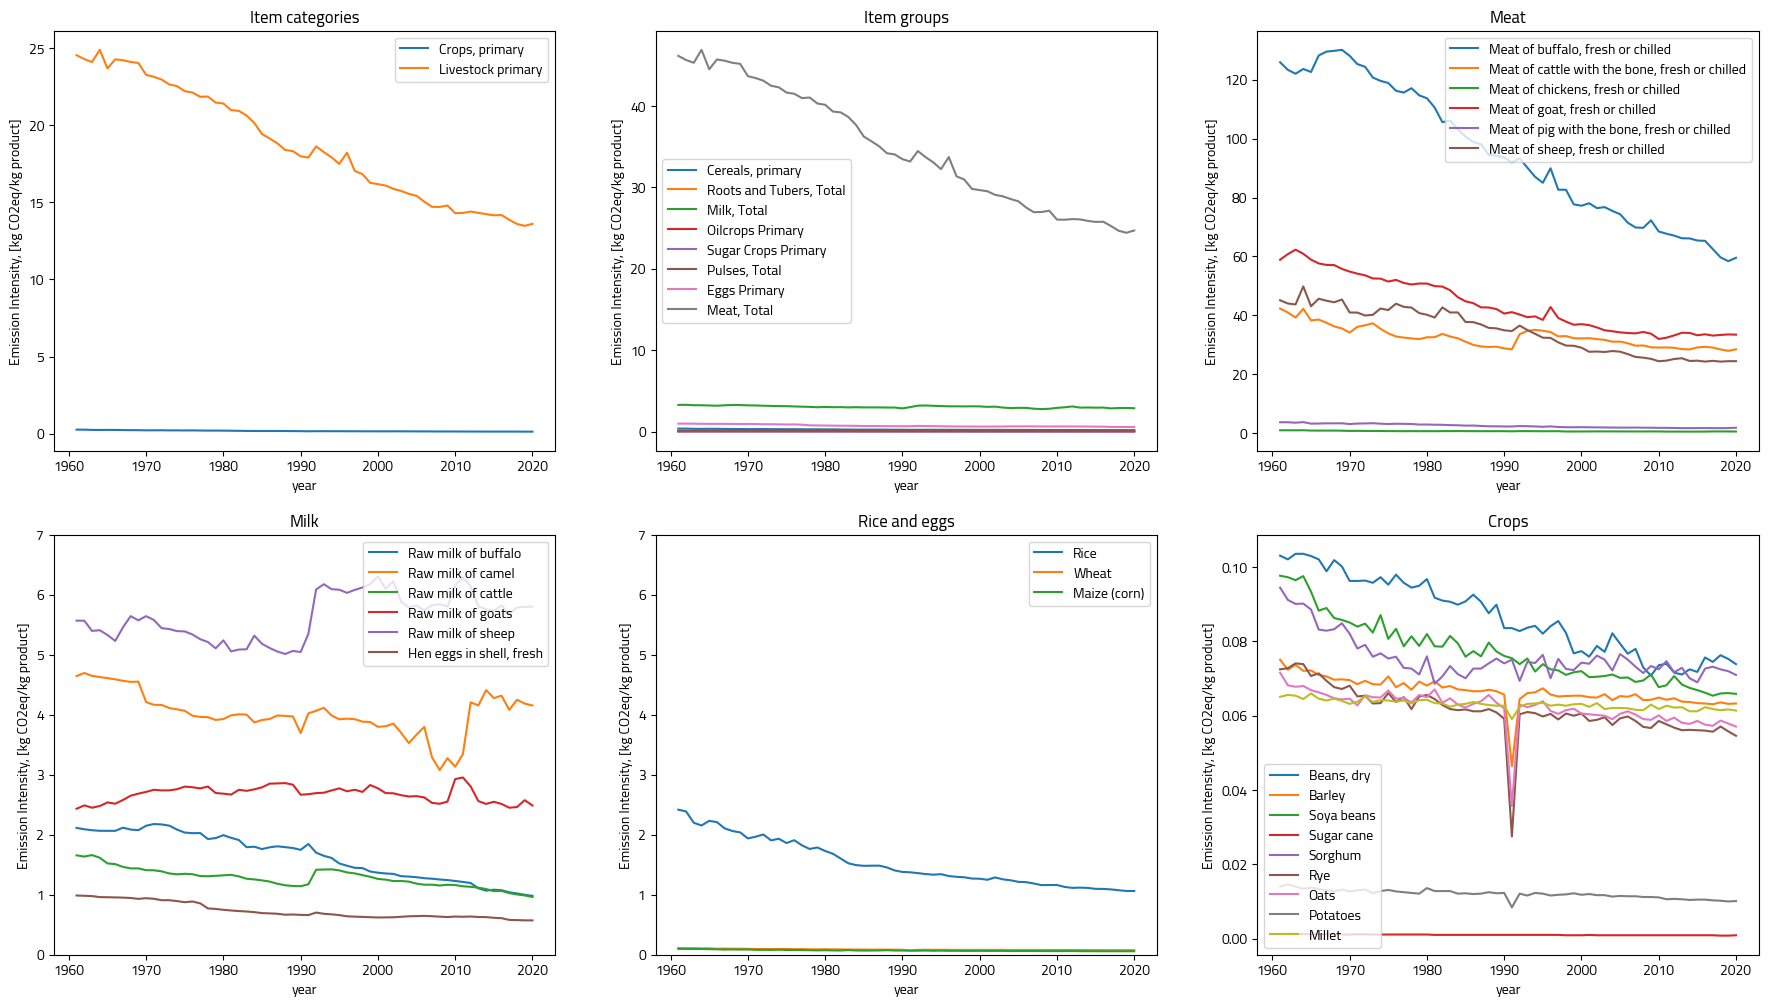

In [35]:
world_emissions_intensity_grouped_1 = world_emissions[['item_category', 'year', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['item_category', 'year'], as_index=False).agg('mean')
world_emissions_intensity_grouped_2 = world_emissions[['item_group', 'year', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['item_group', 'year'], as_index=False).agg('mean')
world_emissions_intensity_grouped_3 = world_emissions[['item', 'year', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['item', 'year'], as_index=False).agg('mean')

fig, axes = plt.subplots(2, 3, figsize=(22, 12))

# Iterate over item categories
for item_category in item_categories:
    world_emissions_intensity_grouped_1[world_emissions_intensity_grouped_1.item_category == item_category].plot(x='year', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes[0][0], label=item_category)
    axes[0][0].legend()
    axes[0][0].set_ylabel('Emission Intensity, [kg CO2eq/kg product]')
    axes[0][0].set_title('Item categories')

# Iterate over item groups
for item_group in item_groups:
    world_emissions_intensity_grouped_2[world_emissions_intensity_grouped_2.item_group == item_group].plot(x='year', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes[0][1], label=item_group)
    axes[0][1].legend()
    axes[0][1].set_ylabel('Emission Intensity, [kg CO2eq/kg product]')
    axes[0][1].set_title('Item groups')

# Iterate over meat items
for item in meat:
    world_emissions_intensity_grouped_3[world_emissions_intensity_grouped_3.item == item].plot(x='year', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes[0][2], label=item)
    axes[0][2].legend()
    axes[0][2].set_ylabel('Emission Intensity, [kg CO2eq/kg product]')
    axes[0][2].set_title('Meat')

# Iterate over milk and egg items
for item in milk_eggs:
    world_emissions_intensity_grouped_3[world_emissions_intensity_grouped_3.item == item].plot(x='year', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes[1][0], label=item)
    axes[1][0].legend()
    axes[1][0].set_ylabel('Emission Intensity, [kg CO2eq/kg product]')
    axes[1][0].set_title('Milk')
    axes[1][0].set_ylim([0,7])

# Iterate over rice, wheat and maize items
for item in rice_wheat_maize:
    world_emissions_intensity_grouped_3[world_emissions_intensity_grouped_3.item == item].plot(x='year', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes[1][1], label=item)
    axes[1][1].legend()
    axes[1][1].set_ylabel('Emission Intensity, [kg CO2eq/kg product]')
    axes[1][1].set_title('Rice and eggs')
    axes[1][1].set_ylim([0,7])
    
# Iterate over remaining items
for item in remaining:
    world_emissions_intensity_grouped_3[world_emissions_intensity_grouped_3.item == item].plot(x='year', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes[1][2], label=item)
    axes[1][2].legend()
    axes[1][2].set_ylabel('Emission Intensity, [kg CO2eq/kg product]')
    axes[1][2].set_title('Crops')

## Analysis for 2020

### Country comparison - production and emissions

In [36]:
prod_emis_countries = df_prod_emis[(df_prod_emis.year == 2020) & (df_prod_emis.emissions_co2eq_combined_in_kt.notnull()) & (df_prod_emis.country != 'World')]

Text(0, 0.5, 'Emissions in kt (co2eq)')

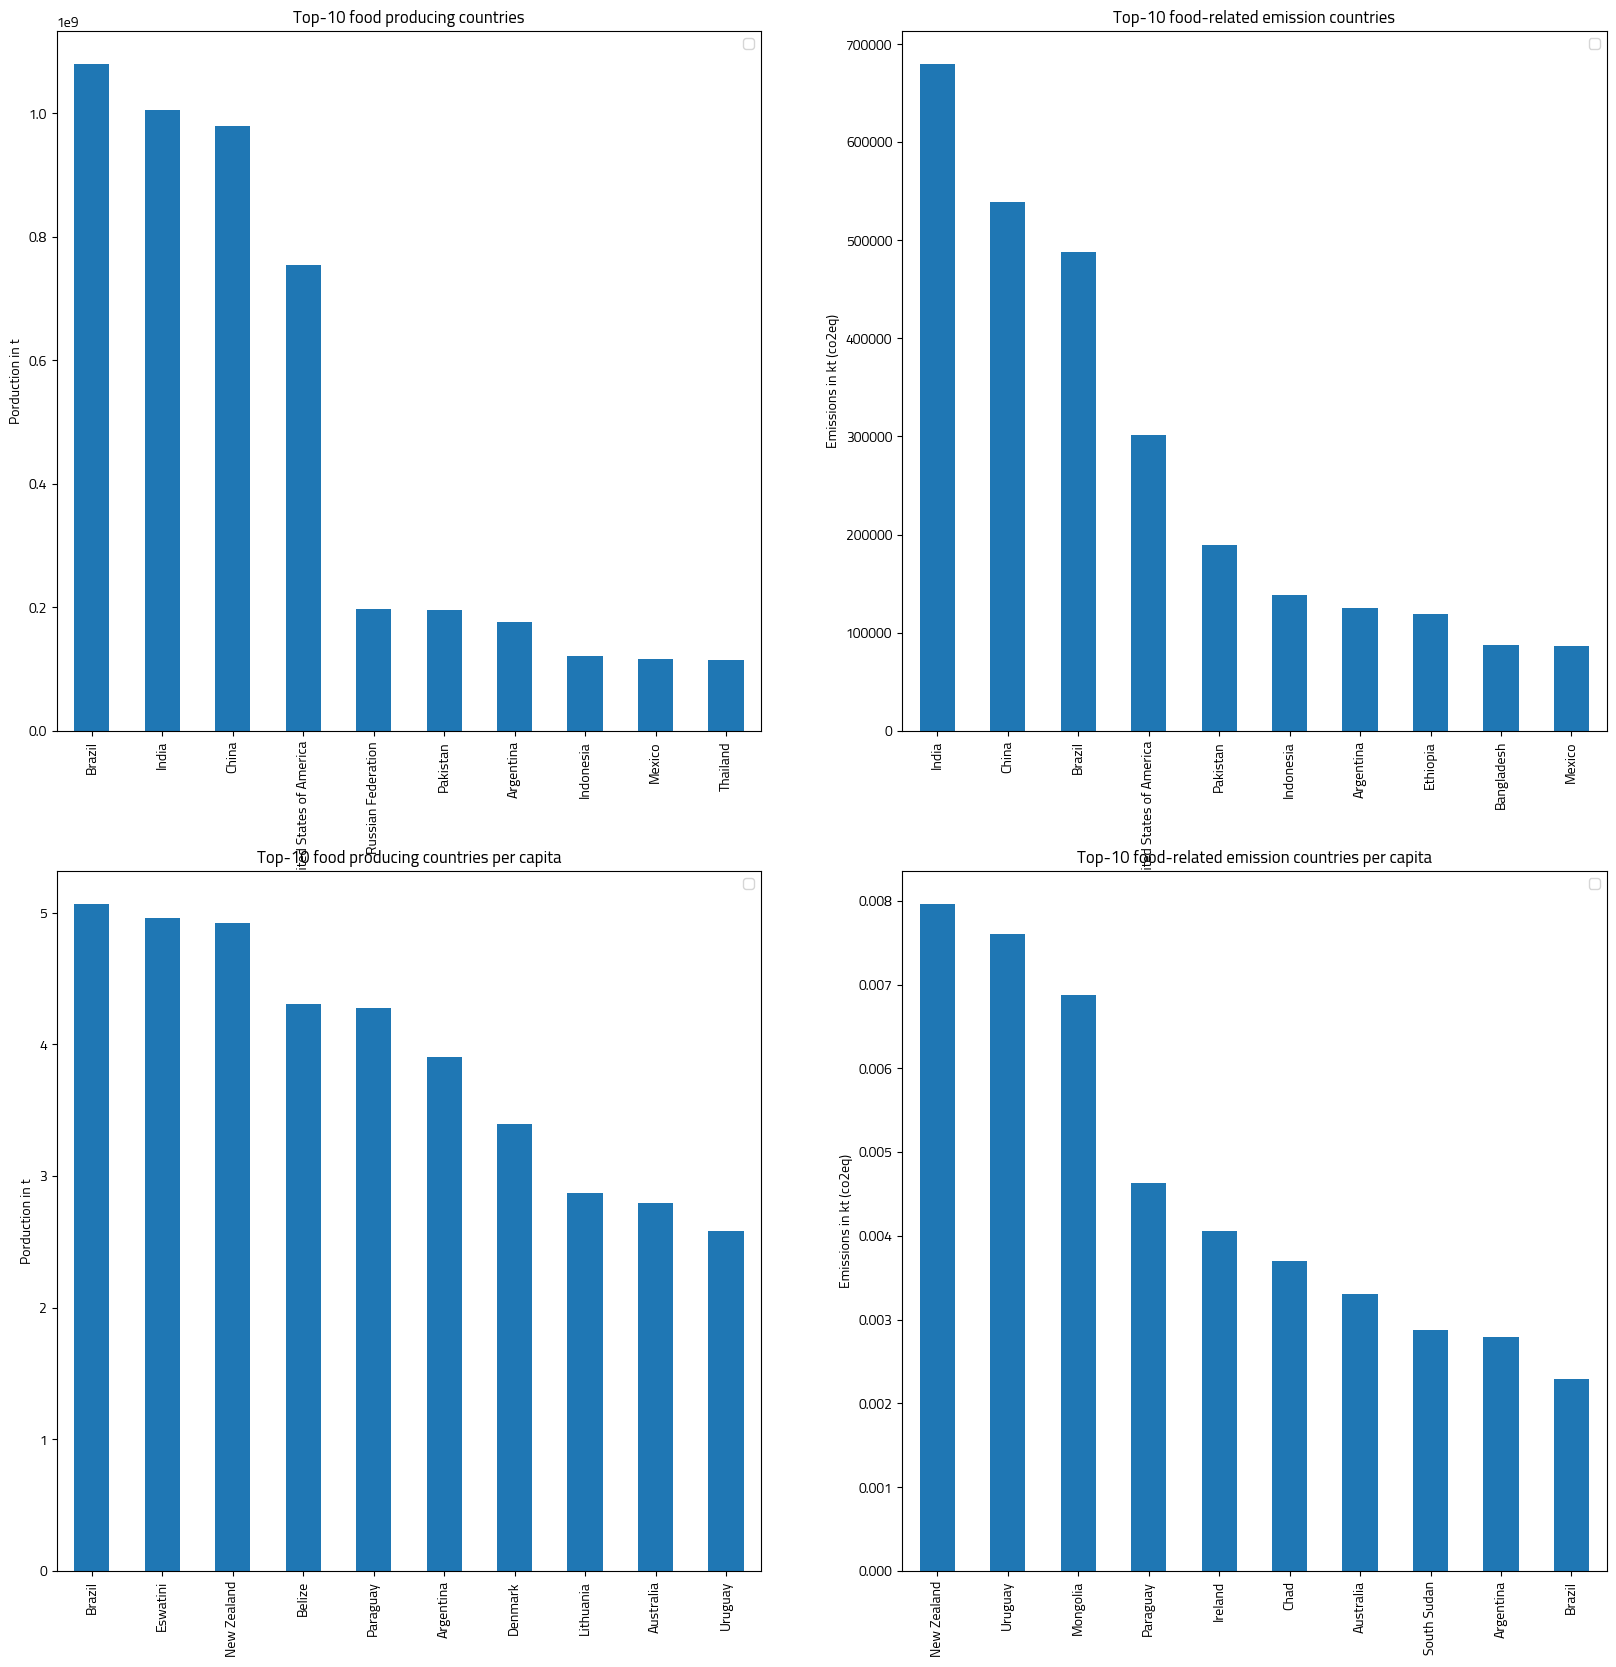

In [37]:
prod_emis_countries_grouped_1 = prod_emis_countries[['country', 'production_in_t']].groupby(['country'], as_index=False).agg('sum').sort_values(by='production_in_t', ascending=False)
prod_emis_countries_grouped_2 = prod_emis_countries[['country', 'prod_pop']].groupby(['country'], as_index=False).agg('sum').sort_values(by='prod_pop', ascending=False)
prod_emis_countries_grouped_3 = prod_emis_countries[['country', 'emissions_co2eq_combined_in_kt']].groupby(['country'], as_index=False).agg('sum').sort_values(by='emissions_co2eq_combined_in_kt', ascending=False)
prod_emis_countries_grouped_4 = prod_emis_countries[['country', 'emis_pop']].groupby(['country'], as_index=False).agg('sum').sort_values(by='emis_pop', ascending=False)

fig, axes = plt.subplots(2, 2, figsize=(20, 20))

prod_emis_countries_grouped_1.head(10).plot.bar(x='country', y='production_in_t', ax=axes[0][0])
axes[0][0].set_title('Top-10 food producing countries')
axes[0][0].set_xlabel('')
axes[0][0].legend('')
axes[0][0].set_ylabel('Porduction in t')

prod_emis_countries_grouped_3.head(10).plot.bar(x='country', y='emissions_co2eq_combined_in_kt', ax=axes[0][1])
axes[0][1].set_title('Top-10 food-related emission countries')
axes[0][1].set_xlabel('')
axes[0][1].legend('')
axes[0][1].set_ylabel('Emissions in kt (co2eq)')

prod_emis_countries_grouped_2.head(10).plot.bar(x='country', y='prod_pop', ax=axes[1][0])
axes[1][0].set_title('Top-10 food producing countries per capita')
axes[1][0].set_xlabel('')
axes[1][0].legend('')
axes[1][0].set_ylabel('Porduction in t')

prod_emis_countries_grouped_4.head(10).plot.bar(x='country', y='emis_pop', ax=axes[1][1])
axes[1][1].set_title('Top-10 food-related emission countries per capita')
axes[1][1].set_xlabel('')
axes[1][1].legend('')
axes[1][1].set_ylabel('Emissions in kt (co2eq)')

### Item comparison - production and emissions

In [38]:
prod_emis_items = df_prod_emis[(df_prod_emis.emissions_co2eq_combined_in_kt.notnull()) & (df_prod_emis.country == 'World')]

In [39]:
items = prod_emis_items.item.unique().tolist()
meat = list(filter(lambda x: 'Meat' in x, items))
milk_eggs= list(filter(lambda x: 'Raw milk' in x or 'Hen eggs' in x, items))
rice = list(filter(lambda x: 'Rice' in x, items))
crops = list(set(items) - set(meat + milk_eggs + rice))

In [40]:
def food_type(food_item):
    if food_item in meat:
        return 'meat'
    elif food_item in milk_eggs:
        return 'milk & eggs'
    return 'crops'

In [41]:
prod_emis_items['food_type'] = prod_emis_items.item.apply(lambda x: food_type(x))

/var/folders/r1/n_vkkx7s0c56p3j6pvf4pxf40000gn/T/ipykernel_23870/4085573758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_emis_items['food_type'] = prod_emis_items.item.apply(lambda x: food_type(x))


In [46]:
from mycolorpy import colorlist as mcp
import numpy as np

color1=mcp.gen_color(cmap="tab20c",n=20)
print(color1)

['#3182bd', '#6baed6', '#9ecae1', '#c6dbef', '#e6550d', '#fd8d3c', '#fdae6b', '#fdd0a2', '#31a354', '#74c476', '#a1d99b', '#c7e9c0', '#756bb1', '#9e9ac8', '#bcbddc', '#dadaeb', '#636363', '#969696', '#bdbdbd', '#d9d9d9']


Text(0.5, 1.0, 'Food Emissions in 2020')

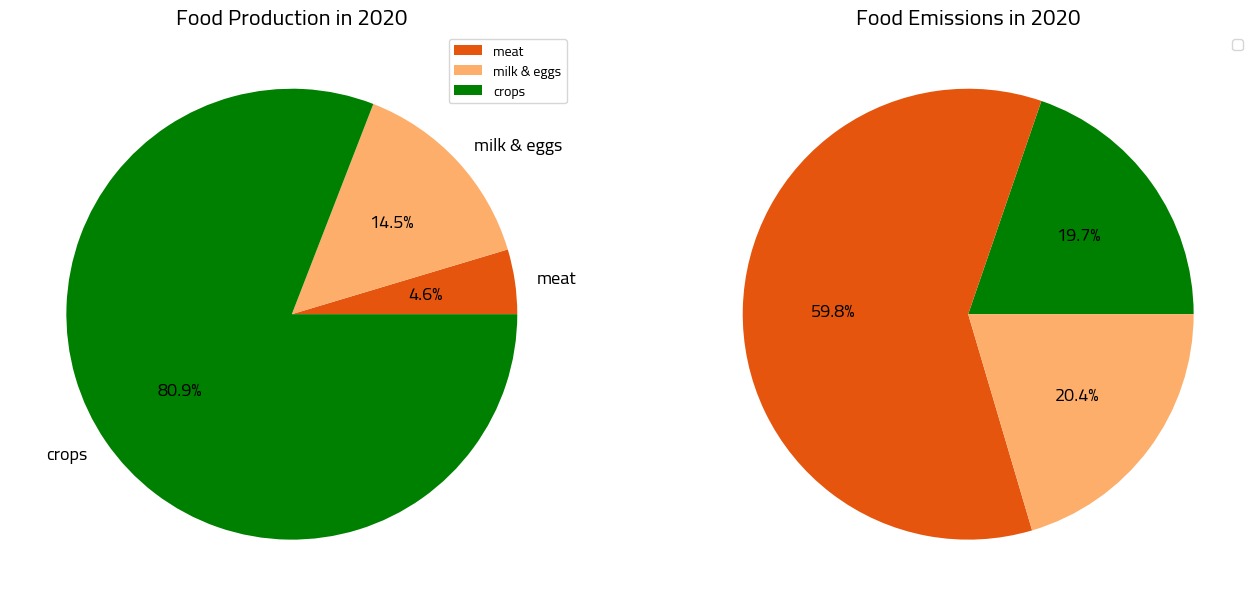

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
plt.rcParams['font.family'] = 'Cairo'

prod_emis_items_1 = prod_emis_items[prod_emis_items.year == 2020]

prod_emis_items_1[['food_type', 'production_in_t']].groupby('food_type').agg('sum').sort_values(by='production_in_t', ascending=True).plot.pie(y='production_in_t', ax=axes[0], fontsize=13, autopct='%1.1f%%', colors = ['#e6550d', '#fdae6b', 'green'])
axes[0].set_ylabel('')
axes[0].legend()
axes[0].set_title('Food Production in 2020', fontsize=16)

prod_emis_items_1[['food_type', 'emissions_co2eq_combined_in_kt']].groupby('food_type').agg('sum').plot.pie(y='emissions_co2eq_combined_in_kt', ax=axes[1], fontsize=13, autopct='%1.1f%%', colors = ['green', '#e6550d', '#fdae6b'], labels=['', '', ''])
axes[1].set_ylabel('')
axes[1].legend('')
axes[1].set_title('Food Emissions in 2020', fontsize=16)

Text(0.5, 1.0, 'Production by item group in 2020')

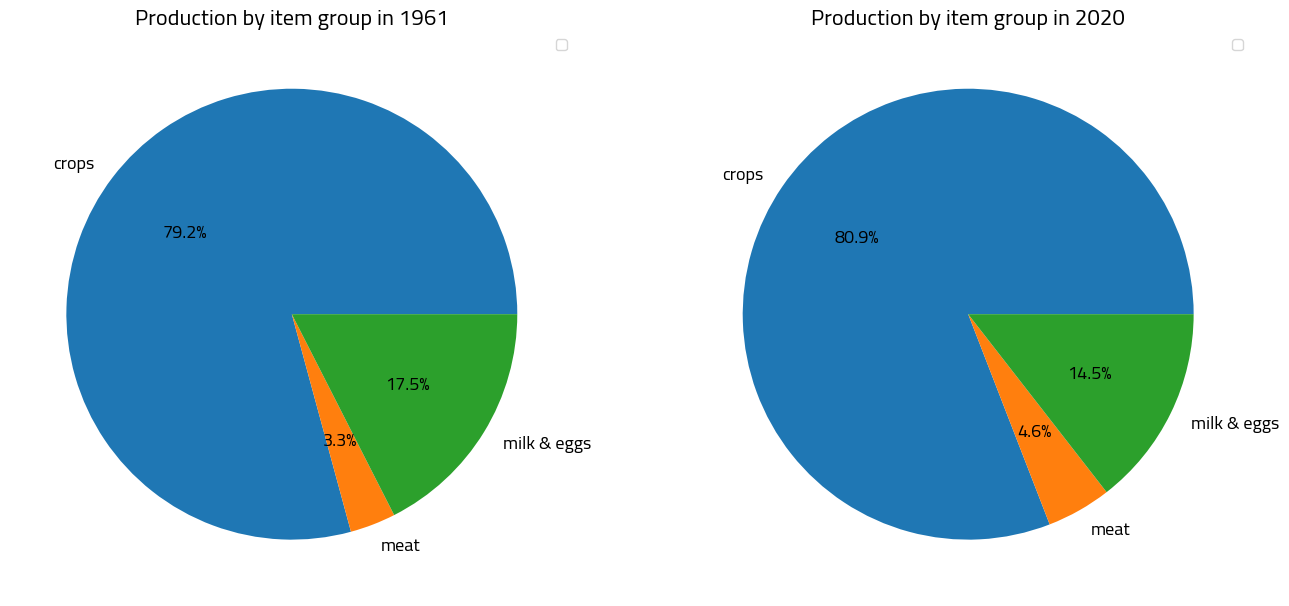

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

prod_emis_items_1961 = prod_emis_items[(prod_emis_items.year == 1961)]
prod_emis_items020 = prod_emis_items[(prod_emis_items.year == 2020)]

prod_emis_items_1961[['food_type', 'production_in_t']].groupby('food_type').agg('sum').plot.pie(y='production_in_t', ax=axes[0], fontsize=13, autopct='%1.1f%%')
axes[0].set_ylabel('')
axes[0].legend('')
axes[0].set_title('Production by item group in 1961', fontsize=16)

prod_emis_items020[['food_type', 'production_in_t']].groupby('food_type').agg('sum').plot.pie(y='production_in_t', ax=axes[1], fontsize=13, autopct='%1.1f%%')
axes[1].set_ylabel('')
axes[1].legend('')
axes[1].set_title('Production by item group in 2020', fontsize=16)

### Item comparison - emission itensities

In [49]:
prod_emis_intensities = df_prod_emis[(df_prod_emis.year == 2020) & (df_prod_emis.emissions_co2eq_combined_in_kt.notnull())]

In [50]:
prod_emis_intensities_names = prod_emis_intensities
prod_emis_intensities_names['item'] = prod_emis_intensities_names['item'].str.replace(', fresh or chilled', '')
prod_emis_intensities_names['item'] = prod_emis_intensities_names['item'].str.replace(' with the bone', '')

/var/folders/r1/n_vkkx7s0c56p3j6pvf4pxf40000gn/T/ipykernel_23870/3931181892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_emis_intensities_names['item'] = prod_emis_intensities_names['item'].str.replace(', fresh or chilled', '')
/var/folders/r1/n_vkkx7s0c56p3j6pvf4pxf40000gn/T/ipykernel_23870/3931181892.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_emis_intensities_names['item'] = prod_emis_intensities_names['item'].str.replace(' with the bone', '')


### Emission itensities overall

Text(0.5, 0, 'Emission intensity in kg CO2eq / kg')

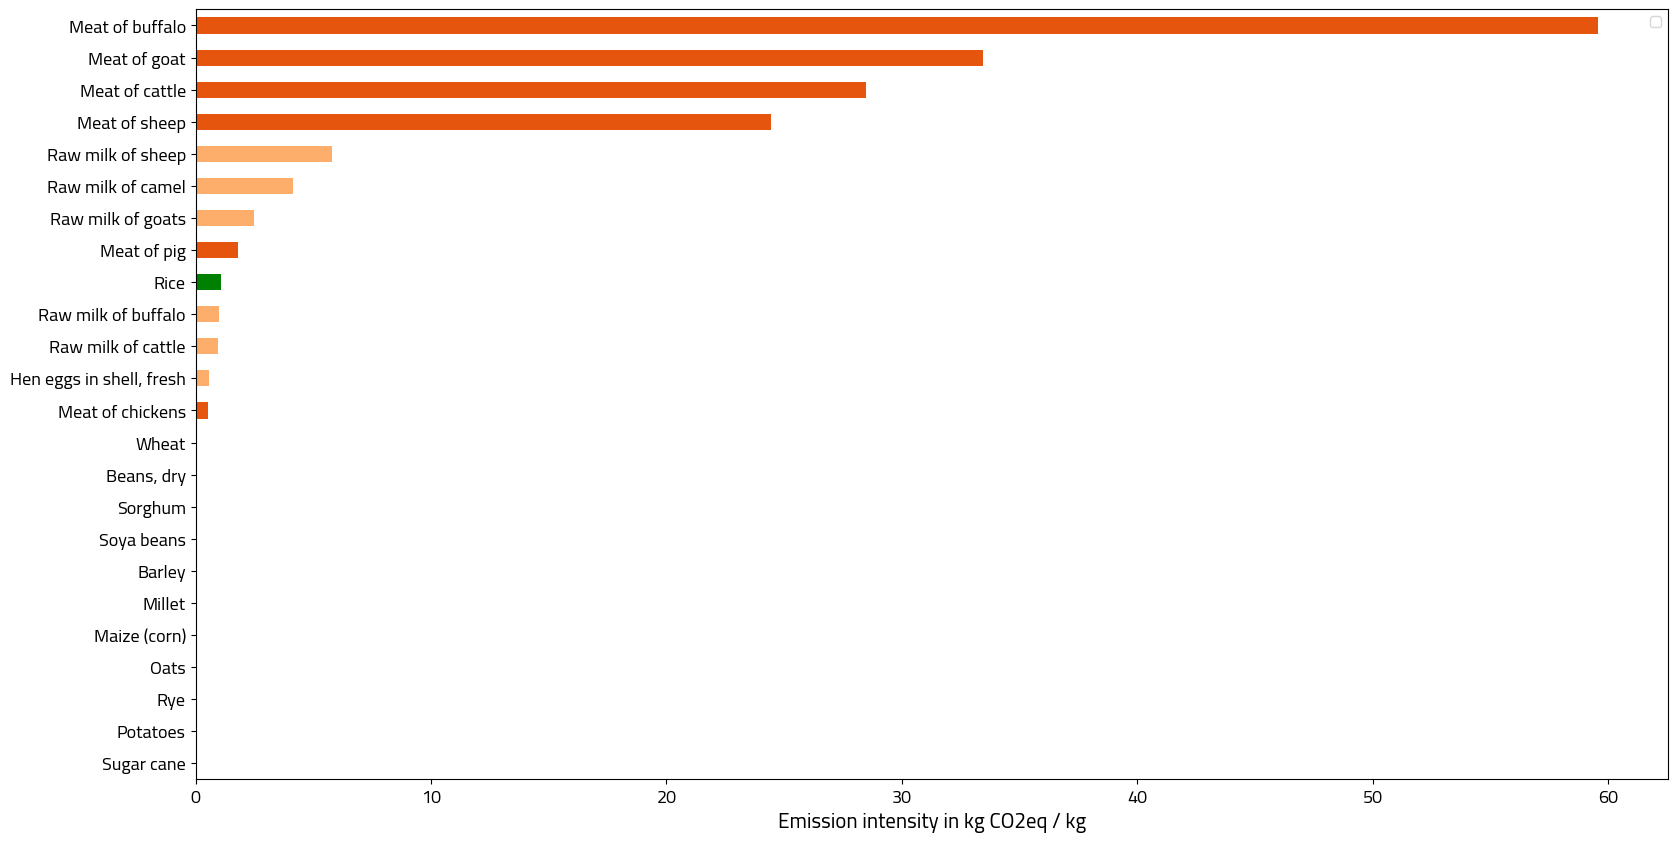

In [51]:
prod_emis_intensities_names_grouped_1 = prod_emis_intensities_names[(prod_emis_intensities_names['special_area'] == 'World') & (prod_emis_intensities['emissions_intensity_combined_in_kg_co2eq_per_kg'] != 0)]
prod_emis_intensities_names_grouped_1 = prod_emis_intensities_names_grouped_1[['item', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['item'], as_index=False).agg('mean').sort_values(by='emissions_intensity_combined_in_kg_co2eq_per_kg', ascending=True)
prod_emis_intensities_names_grouped_2 = prod_emis_intensities_names[prod_emis_intensities_names['country'] == 'Germany']
prod_emis_intensities_names_grouped_2= prod_emis_intensities_names_grouped_2[['item', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['item'], as_index=False).agg('mean').sort_values(by='emissions_intensity_combined_in_kg_co2eq_per_kg', ascending=True)
prod_emis_intensities_names_grouped_3 = prod_emis_intensities_names[prod_emis_intensities_names['special_area'] == 'European Union (27)']
prod_emis_intensities_names_grouped_3= prod_emis_intensities_names_grouped_3[['item', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['item'], as_index=False).agg('mean').sort_values(by='emissions_intensity_combined_in_kg_co2eq_per_kg', ascending=True)

fig, axes = plt.subplots(1, 1, figsize=(19, 10))

colors = ['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', '#e6550d', '#fdae6b', '#fdae6b', '#fdae6b', 'green', '#e6550d', '#fdae6b', '#fdae6b', '#fdae6b', '#e6550d', '#e6550d', '#e6550d', '#e6550d']

prod_emis_intensities_names_grouped_1.plot.barh(x='item', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes, color=colors)
#axes.set_title('World emissions intensity')
axes.set_ylabel('')
plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)
axes.legend('')
axes.set_xlabel('Emission intensity in kg CO2eq / kg', fontsize = 15)

Text(0.5, 0, 'Emission intensity in kg CO2eq / kg')

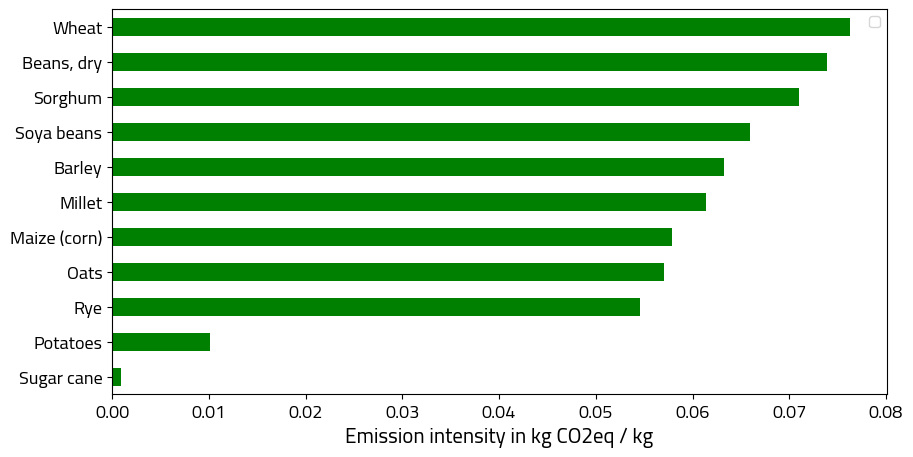

In [52]:
prod_emis_intensities_names_grouped_1 = prod_emis_intensities_names[(prod_emis_intensities_names.special_area == 'World') & (prod_emis_intensities_names.item_category == 'Crops, primary') & (prod_emis_intensities_names.item != 'Rice')]
prod_emis_intensities_names_grouped_1 = prod_emis_intensities_names_grouped_1[['item', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['item'], as_index=False).agg('mean').sort_values(by='emissions_intensity_combined_in_kg_co2eq_per_kg', ascending=True)

fig, axes = plt.subplots(1, 1, figsize=(10, 5))

prod_emis_intensities_names_grouped_1.plot.barh(x='item', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes, color = 'green')
#axes.set_title('World emissions intensity')
axes.set_ylabel('')
plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)
axes.legend('')
axes.set_xlabel('Emission intensity in kg CO2eq / kg', fontsize = 15)

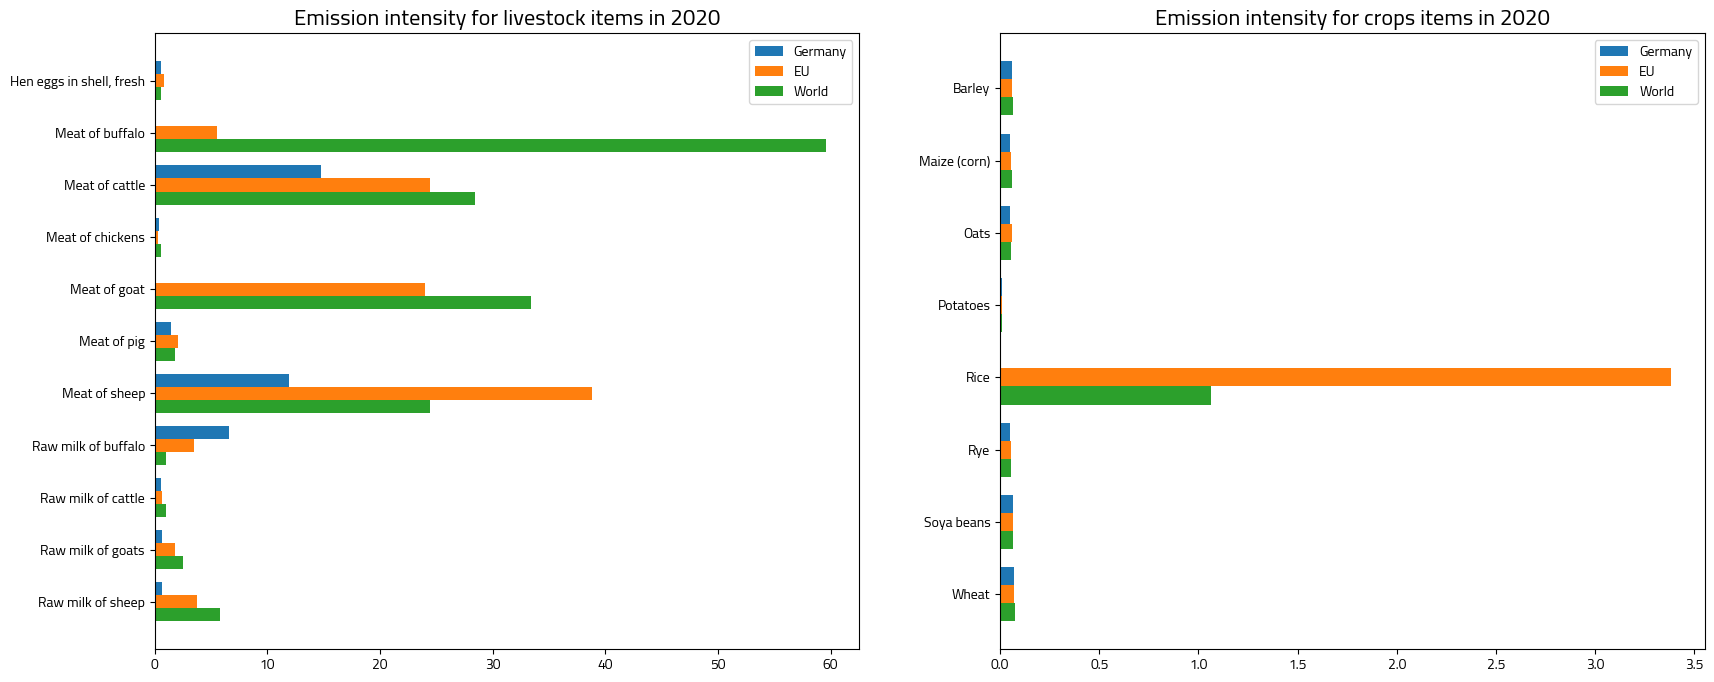

In [53]:
prod_emis_intensities_names_grouped_4 = prod_emis_intensities_names[(prod_emis_intensities_names.country == 'Germany') & (prod_emis_intensities_names.item_category == 'Livestock primary')]
prod_emis_intensities_names_grouped_4 = prod_emis_intensities_names_grouped_4[['item', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['item'], as_index=False).agg('mean').sort_values(by='item', ascending=False)

prod_emis_intensities_names_grouped_5 = prod_emis_intensities_names[(prod_emis_intensities_names.special_area == 'European Union (27)') & (prod_emis_intensities_names.item_category == 'Livestock primary')]
prod_emis_intensities_names_grouped_5 = prod_emis_intensities_names_grouped_5[['item', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['item'], as_index=False).agg('mean').sort_values(by='item', ascending=False)

prod_emis_intensities_names_grouped_6 = prod_emis_intensities_names[(prod_emis_intensities_names.country == 'World') & (prod_emis_intensities_names.item_category == 'Livestock primary')]
prod_emis_intensities_names_grouped_6 = prod_emis_intensities_names_grouped_6[['item', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['item'], as_index=False).agg('mean').sort_values(by='item', ascending=False)

prod_emis_intensities_names_grouped_7 = prod_emis_intensities_names[(prod_emis_intensities_names.country == 'Germany') & (prod_emis_intensities_names.item_category == 'Crops, primary')]
prod_emis_intensities_names_grouped_7 = prod_emis_intensities_names_grouped_7[['item', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['item'], as_index=False).agg('mean').sort_values(by='item', ascending=False)

prod_emis_intensities_names_grouped_8 = prod_emis_intensities_names[(prod_emis_intensities_names.special_area == 'European Union (27)') & (prod_emis_intensities_names.item_category == 'Crops, primary')]
prod_emis_intensities_names_grouped_8 = prod_emis_intensities_names_grouped_8[['item', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['item'], as_index=False).agg('mean').sort_values(by='item', ascending=False)

prod_emis_intensities_names_grouped_9 = prod_emis_intensities_names[(prod_emis_intensities_names.country == 'World') & (prod_emis_intensities_names.item_category == 'Crops, primary')]
prod_emis_intensities_names_grouped_9 = prod_emis_intensities_names_grouped_9[['item', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['item'], as_index=False).agg('mean').sort_values(by='item', ascending=False)



items_livestock = prod_emis_intensities_names_grouped_4.item.unique().tolist()
items_crops = prod_emis_intensities_names_grouped_7.item.unique().tolist()

prod_emis_intensities_names_grouped_5 = prod_emis_intensities_names_grouped_5[prod_emis_intensities_names_grouped_5.item.isin(items_livestock)]
prod_emis_intensities_names_grouped_6 = prod_emis_intensities_names_grouped_6[prod_emis_intensities_names_grouped_6.item.isin(items_livestock)]
prod_emis_intensities_names_grouped_8 = prod_emis_intensities_names_grouped_8[prod_emis_intensities_names_grouped_8.item.isin(items_crops)]
prod_emis_intensities_names_grouped_9 = prod_emis_intensities_names_grouped_9[prod_emis_intensities_names_grouped_9.item.isin(items_crops)]


fig, ax = plt.subplots(1, 2, figsize=(20, 8))
index_1 = np.arange(len(items_livestock))
index_2 = np.arange(len(items_crops))
bar_width = 0.25

rects1 = ax[0].barh(index_1 + 2 * bar_width, prod_emis_intensities_names_grouped_4.emissions_intensity_combined_in_kg_co2eq_per_kg, bar_width,label='Germany')

rects2 = ax[0].barh(index_1 + bar_width, prod_emis_intensities_names_grouped_5.emissions_intensity_combined_in_kg_co2eq_per_kg, bar_width,label='EU')

rects3 = ax[0].barh(index_1, prod_emis_intensities_names_grouped_6.emissions_intensity_combined_in_kg_co2eq_per_kg, bar_width,label='World')

#ax[0].set_ylabel('Food items')
#ax[0].set_xlabel('Emission intensity')
ax[0].set_title('Emission intensity for livestock items in 2020', fontsize=16)
ax[0].set_yticks(index_1 + bar_width, items_livestock)
ax[0].legend()

rects1 = ax[1].barh(index_2 + 2 * bar_width, prod_emis_intensities_names_grouped_7.emissions_intensity_combined_in_kg_co2eq_per_kg, bar_width,label='Germany')

rects2 = ax[1].barh(index_2 + bar_width, prod_emis_intensities_names_grouped_8.emissions_intensity_combined_in_kg_co2eq_per_kg, bar_width,label='EU')

rects2 = ax[1].barh(index_2, prod_emis_intensities_names_grouped_9.emissions_intensity_combined_in_kg_co2eq_per_kg, bar_width,label='World')

#ax[1].set_ylabel('Food items')
#ax[1].set_xlabel('Emission intensity')
ax[1].set_title('Emission intensity for crops items in 2020', fontsize=16)
ax[1].set_yticks(index_2 + bar_width, items_crops)
ax[1].legend()

### Emission itensities by countries/continents

In [54]:
prod_emis_intensities = df_prod_emis[(df_prod_emis.year == 2020) & (df_prod_emis.emissions_co2eq_combined_in_kt.notnull())]

Text(0, 0.5, 'emission intensity')

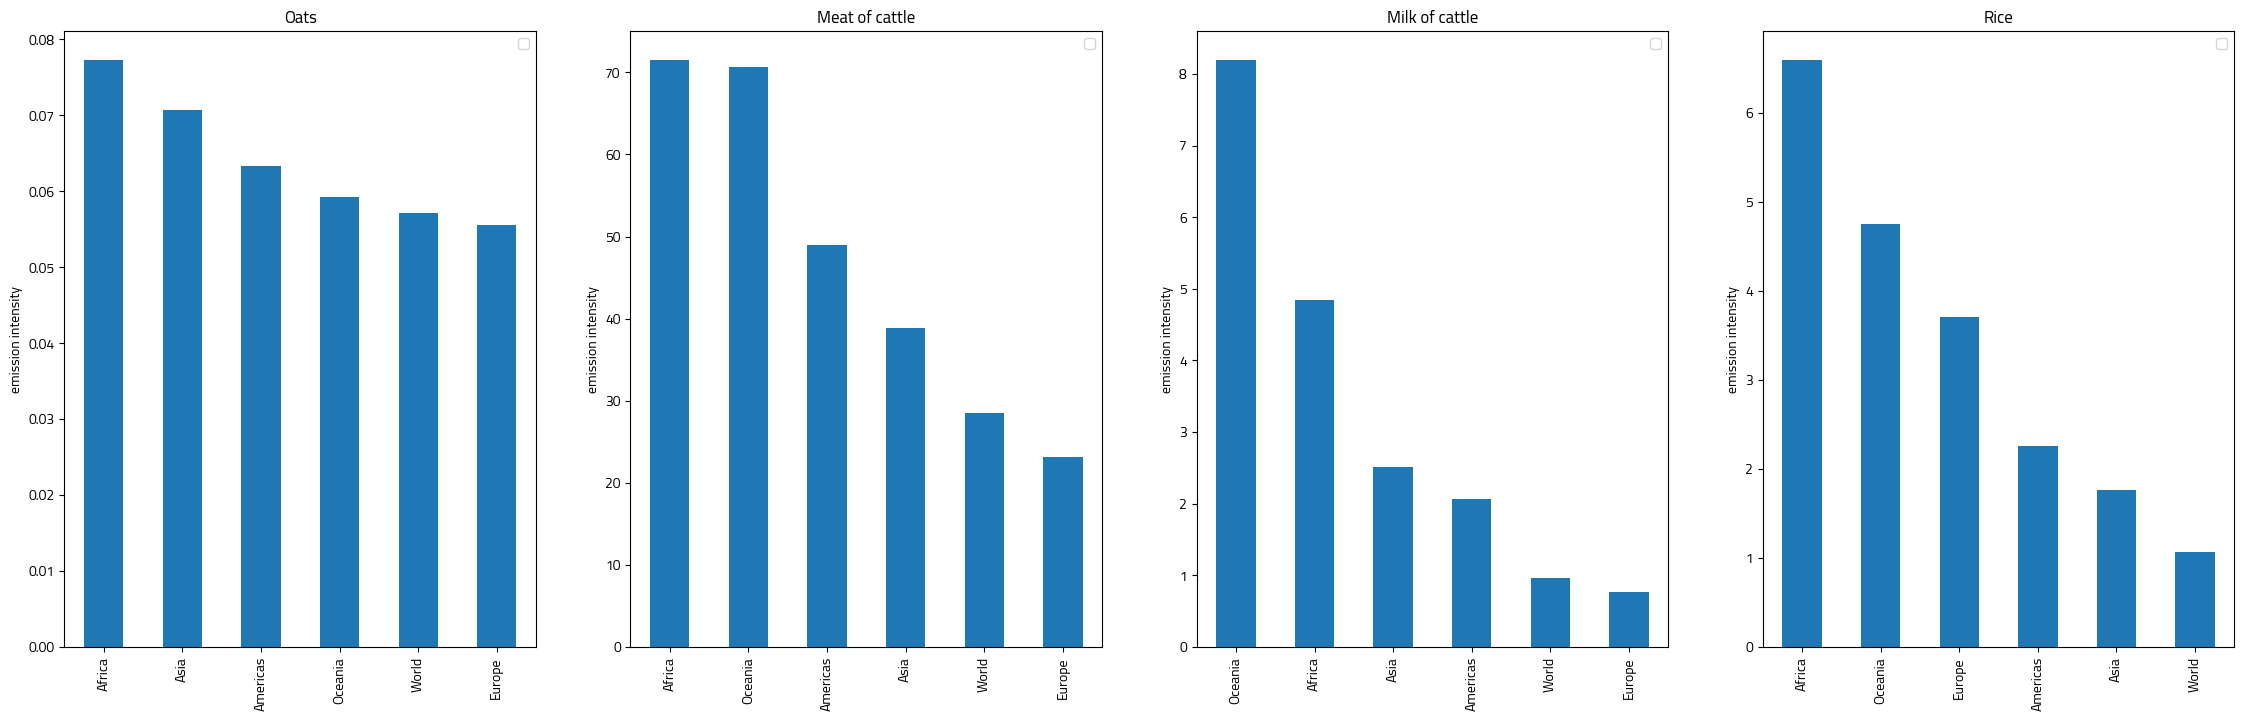

In [55]:
prod_emis_intensities_grouped_1 = prod_emis_intensities[prod_emis_intensities['item'] == 'Oats']
prod_emis_intensities_grouped_1 = prod_emis_intensities_grouped_1[['continent', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['continent'], as_index=False).agg('mean').sort_values(by='emissions_intensity_combined_in_kg_co2eq_per_kg', ascending=False)

prod_emis_intensities_grouped_2 = prod_emis_intensities[prod_emis_intensities['item'] == 'Meat of cattle with the bone, fresh or chilled']
prod_emis_intensities_grouped_2 = prod_emis_intensities_grouped_2[['continent', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['continent'], as_index=False).agg('mean').sort_values(by='emissions_intensity_combined_in_kg_co2eq_per_kg', ascending=False)

prod_emis_intensities_grouped_3 = prod_emis_intensities[prod_emis_intensities['item'] == 'Raw milk of cattle']
prod_emis_intensities_grouped_3 = prod_emis_intensities_grouped_3[['continent', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['continent'], as_index=False).agg('mean').sort_values(by='emissions_intensity_combined_in_kg_co2eq_per_kg', ascending=False)

prod_emis_intensities_grouped_4 = prod_emis_intensities[prod_emis_intensities['item'] == 'Rice']
prod_emis_intensities_grouped_4 = prod_emis_intensities_grouped_4[['continent', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['continent'], as_index=False).agg('mean').sort_values(by='emissions_intensity_combined_in_kg_co2eq_per_kg', ascending=False)

fig, axes = plt.subplots(1, 4, figsize=(28, 8))

prod_emis_intensities_grouped_1.plot.bar(x='continent', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes[0])
axes[0].set_title('Oats')
axes[0].set_xlabel('')
axes[0].legend('')
axes[0].set_ylabel('emission intensity')

prod_emis_intensities_grouped_2.plot.bar(x='continent', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes[1])
axes[1].set_title('Meat of cattle')
axes[1].set_xlabel('')
axes[1].legend('')
axes[1].set_ylabel('emission intensity')

prod_emis_intensities_grouped_3.plot.bar(x='continent', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes[2])
axes[2].set_title('Milk of cattle')
axes[2].set_xlabel('')
axes[2].legend('')
axes[2].set_ylabel('emission intensity')

prod_emis_intensities_grouped_4.plot.bar(x='continent', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes[3])
axes[3].set_title('Rice')
axes[3].set_xlabel('')
axes[3].legend('')
axes[3].set_ylabel('emission intensity')

Text(0.5, 1.0, 'Milk of cattle')

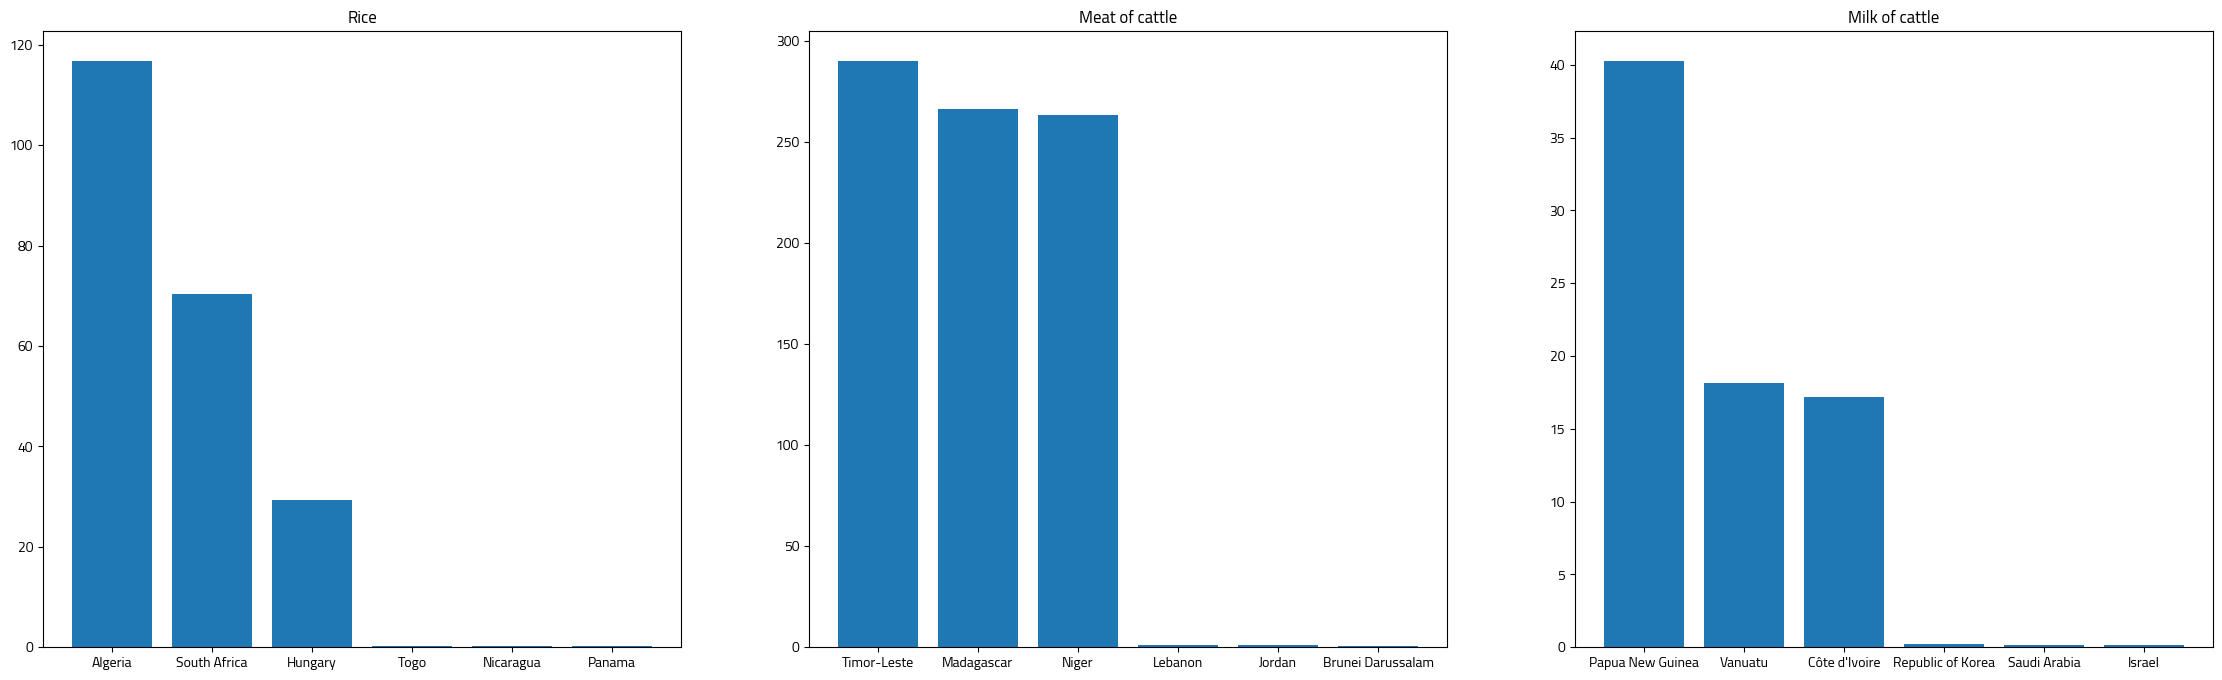

In [56]:
prod_emis_intensities_grouped_1 = prod_emis_intensities[(prod_emis_intensities['item'] == 'Rice') & (prod_emis_intensities['emissions_intensity_combined_in_kg_co2eq_per_kg'].notnull()) & (prod_emis_intensities['emissions_intensity_combined_in_kg_co2eq_per_kg'] != 0)]
prod_emis_intensities_grouped_1 = prod_emis_intensities_grouped_1[['country', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['country'], as_index=False).agg('mean').sort_values(by='emissions_intensity_combined_in_kg_co2eq_per_kg', ascending=False)

prod_emis_intensities_grouped_2 = prod_emis_intensities[(prod_emis_intensities['item'] == 'Meat of cattle with the bone, fresh or chilled') & (prod_emis_intensities['emissions_intensity_combined_in_kg_co2eq_per_kg'].notnull()) & (prod_emis_intensities['emissions_intensity_combined_in_kg_co2eq_per_kg'] != 0)]
prod_emis_intensities_grouped_2 = prod_emis_intensities_grouped_2[['country', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['country'], as_index=False).agg('mean').sort_values(by='emissions_intensity_combined_in_kg_co2eq_per_kg', ascending=False)

prod_emis_intensities_grouped_3 = prod_emis_intensities[(prod_emis_intensities['item'] == 'Raw milk of cattle') & (prod_emis_intensities['emissions_intensity_combined_in_kg_co2eq_per_kg'].notnull()) & (prod_emis_intensities['emissions_intensity_combined_in_kg_co2eq_per_kg'] != 0)]
prod_emis_intensities_grouped_3 = prod_emis_intensities_grouped_3[['country', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['country'], as_index=False).agg('mean').sort_values(by='emissions_intensity_combined_in_kg_co2eq_per_kg', ascending=False)

fig, axes = plt.subplots(1, 3, figsize=(28, 8))

axes[0].bar(prod_emis_intensities_grouped_1.head(3).country.tolist() + prod_emis_intensities_grouped_1.tail(3).country.tolist(), prod_emis_intensities_grouped_1.emissions_intensity_combined_in_kg_co2eq_per_kg.head(3).tolist() + prod_emis_intensities_grouped_1.emissions_intensity_combined_in_kg_co2eq_per_kg.tail(3).tolist())
axes[0].set_title('Rice')

axes[1].bar(prod_emis_intensities_grouped_2.head(3).country.tolist() + prod_emis_intensities_grouped_2.tail(3).country.tolist(), prod_emis_intensities_grouped_2.emissions_intensity_combined_in_kg_co2eq_per_kg.head(3).tolist() + prod_emis_intensities_grouped_2.emissions_intensity_combined_in_kg_co2eq_per_kg.tail(3).tolist())
axes[1].set_title('Meat of cattle')

axes[2].bar(prod_emis_intensities_grouped_3.head(3).country.tolist() + prod_emis_intensities_grouped_3.tail(3).country.tolist(), prod_emis_intensities_grouped_3.emissions_intensity_combined_in_kg_co2eq_per_kg.head(3).tolist() + prod_emis_intensities_grouped_3.emissions_intensity_combined_in_kg_co2eq_per_kg.tail(3).tolist())
axes[2].set_title('Milk of cattle')

In [57]:
prod_emis_intensities_boxplot = prod_emis_intensities[(prod_emis_intensities['emissions_intensity_combined_in_kg_co2eq_per_kg'].notnull()) & (prod_emis_intensities['emissions_intensity_combined_in_kg_co2eq_per_kg'] != 0)]
items = prod_emis_intensities_boxplot.item.unique().tolist()
items

['Millet',
 'Oats',
 'Potatoes',
 'Raw milk of buffalo',
 'Raw milk of camel',
 'Raw milk of cattle',
 'Raw milk of goats',
 'Raw milk of sheep',
 'Rice',
 'Rye',
 'Sorghum',
 'Soya beans',
 'Sugar cane',
 'Wheat',
 'Barley',
 'Beans, dry',
 'Hen eggs in shell, fresh',
 'Maize (corn)',
 'Meat of cattle with the bone, fresh or chilled',
 'Meat of chickens, fresh or chilled',
 'Meat of goat, fresh or chilled',
 'Meat of sheep, fresh or chilled',
 'Meat of pig with the bone, fresh or chilled',
 'Meat of buffalo, fresh or chilled']

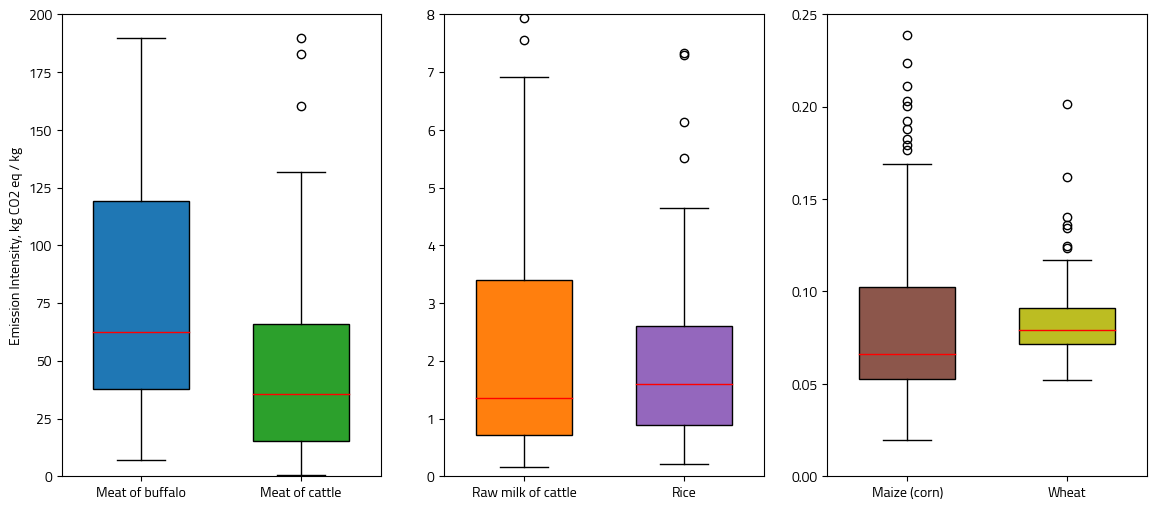

In [58]:
prod_emis_intensities_boxplot = prod_emis_intensities[(prod_emis_intensities['emissions_intensity_combined_in_kg_co2eq_per_kg'].notnull()) & (prod_emis_intensities['emissions_intensity_combined_in_kg_co2eq_per_kg'] != 0)]
                                                           
prod_emis_intensities_1 = prod_emis_intensities_boxplot[(prod_emis_intensities_boxplot.item.isin(['Meat of buffalo, fresh or chilled', 'Meat of cattle with the bone, fresh or chilled']))]
prod_emis_intensities_2 = prod_emis_intensities_boxplot[(prod_emis_intensities_boxplot.item.isin(['Raw milk of cattle', 'Rice']))]
prod_emis_intensities_3 = prod_emis_intensities_boxplot[(prod_emis_intensities_boxplot.item.isin(['Wheat', 'Maize (corn)']))]

grouped_1 = prod_emis_intensities_1.groupby('item')['emissions_intensity_combined_in_kg_co2eq_per_kg']
grouped_2 = prod_emis_intensities_2.groupby('item')['emissions_intensity_combined_in_kg_co2eq_per_kg']
grouped_3 = prod_emis_intensities_3.groupby('item')['emissions_intensity_combined_in_kg_co2eq_per_kg']

fig, ax = plt.subplots(1, 3, figsize=(14, 6))

boxplot_1 = ax[0].boxplot(x=[group.values for name, group in grouped_1], labels=['Meat of buffalo', 'Meat of cattle'], widths=0.6, patch_artist=True,medianprops={'color': 'red'})
boxplot_2 = ax[1].boxplot(x=[group.values for name, group in grouped_2], labels=grouped_2.groups.keys(), widths=0.6, patch_artist=True,medianprops={'color': 'red'})
boxplot_3 = ax[2].boxplot(x=[group.values for name, group in grouped_3], labels=grouped_3.groups.keys(), widths=0.6, patch_artist=True,medianprops={'color': 'red'})

colors_1 = ['tab:blue', 'tab:green']
colors_2 = ['tab:orange', 'tab:purple']
colors_3 = ['tab:brown', 'tab:olive']

for box, color in zip(boxplot_1['boxes'], colors_1): box.set_facecolor(color)
for box, color in zip(boxplot_2['boxes'], colors_2): box.set_facecolor(color)
for box, color in zip(boxplot_3['boxes'], colors_3): box.set_facecolor(color)

ax[0].set_ylim(0,200)
ax[1].set_ylim(0,8)
ax[2].set_ylim(0,0.25)

ax[0].set_ylabel('Emission Intensity, kg CO2 eq / kg')

plt.show()